# Table of Contents

* [Introduction](#Introduction)
* [Client](#Client)
* [Load Packages and Data](#Load-Packages-and-Data)
* [Data Wrangling and Cleaning](#Data-Wrangling-and-Cleaning)
    * [Missing Values](#Missing-Values)
    * [Check and Drop Duplicates](#Check-and-Drop-Duplicates)
    * [Cleaning and Enriching Features](#Cleaning-and-Enriching-Features)
    * [Summary](#Summary)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Summary Statistics](#Summary-Statistics)
    * [Visualization of Hotels](#Visualization-of-Hotels)
    * [Visualization of Reviewers](#Visualization-of-Reviewers)
    * [Visualization of Reviews](#NLP-of-Text-Data)
* [Next Steps](#Next-Steps)

## Introduction
Nowadays, people travel very often for business or for holidays. Travelers want to select hotels with clean rooms, high-quality service, convenient location etc. In a word, people hope to find a cozy and cost-effective hotel to stay while traveling. A massive amount of reviews are being posted online and people are influenced by online reviews in making their decisions. Each person has its own taste of 'cozy'. Where are the perfect hotels to your taste located? What are other travelers saying about that hotel? Are previous travelers having positive experience or bad one concerning your needs? We propose to investigate hotel reviews data and perform text analysis and topic modeling using Naive Bayes and LDA. We also propose to build a machine learning model for predicting review scores from the features we have in the data.

## Client
Travelers will certainly be interested in this project. They might spend lots of time searching/reading/evaluating hotels and the reviews. This project will save a vast amount of time for travelers. Hotel owners are eager to know what customers are talking and especially caring about the hotels. This project can help them improve service quality and maximize their business profit. Other potential clients include travel service agencies and housing agencies etc. Since it's really hard to manually read through all the reviews, being able to extract hidden topics in a large volume of texts is highly valuable to businesses, for instance, websites and companies selling bookings and travel advice. 

## Load Packages and Data
The dataset is originally from [kaggle](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe). It is about 515K hotel reviews data in Europe. It's a csv file containing information on hotel name, hotel address, review date, review scores, reviewers' nationality, positive/negative reviews' word count etc.

The data can be enriched by adding hotel features acquired from, for instance, trip advisor etc.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import seaborn as sns
sns.set(context='paper',style='whitegrid',font_scale=2, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_columns', None)

import folium
from folium import plugins
from folium.plugins import MarkerCluster


from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import re
import nltk


import warnings
warnings.filterwarnings('ignore')



In [2]:
hotel=pd.read_csv('data/Hotel_Reviews.csv',parse_dates=['Review_Date'],index_col='Review_Date')
hotel.info()
hotel.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515738 entries, 2017-08-03 to 2015-08-09
Data columns (total 16 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null float64
Tags                                          51

Hotel_Address  \
Review_Date                                                      
2017-08-03    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2017-08-03    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2017-07-31    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2017-07-31    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2017-07-24    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

             Additional_Number_of_Scoring  Average_Score   Hotel_Name  \
Review_Date                                                             
2017-08-03                            194            7.7  Hotel Arena   
2017-08-03                            194            7.7  Hotel Arena   
2017-07-31                            194            7.7  Hotel Arena   
2017-07-31                            194            7.7  Hotel Arena   
2017-07-24                            194            7.7  Hotel Arena   

            Reviewer_Nationality  \
Review_Date                        
2017-08-03               Russia    
2017-08-03              Ireland    
2017-07-31            Australia    
2017-07-31       United Kingdom    
2017-07-24          New Zealand    

                                               Negative_Review  \
Review_Date                                                      
2017-08-03    I am so angry that i made this post available...   
2017-08-03                                         No Negative   
2017-07-31    Rooms are nice but for elderly a bit difficul...   
2017-07-31    My room was dirty and I was afraid to walk ba...   
2017-07-24    You When I booked with your company on line y...   

             Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
Review_Date                                                               
2017-08-03                                 397                     1403   
2017-08-03                                   0                     1403   
2017-07-31                                  42                     1403   
2017-07-31                                 210                     1403   
2017-07-24                                 140                     1403   

                                               Positive_Review  \
Review_Date                                                      
2017-08-03    Only the park outside of the hotel was beauti...   
2017-08-03    No real complaints the hotel was great great ...   
2017-07-31    Location was good and staff were ok It is cut...   
2017-07-31    Great location in nice surroundings the bar a...   
2017-07-24     Amazing location and building Romantic setting    

             Review_Total_Positive_Word_Counts  \
Review_Date                                      
2017-08-03                                  11   
2017-08-03                                 105   
2017-07-31                                  21   
2017-07-31                                  26   
2017-07-24                                   8   

             Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
Review_Date                                                               
2017-08-03                                            7             2.9   
2017-08-03                                            7             7.5   
2017-07-31                                            9             7.1   
2017-07-31                                            1             3.8   
2017-07-24                                            3             6.7   

                                                          Tags  \
Review_Date                                                      
2017-08-03   [' Leisure trip ', ' Couple ', ' Duplex Double...   
2017-08-03   [' Leisure trip ', ' Couple ', ' Duplex Double...   
2017-07-31   [' Leisure trip ', ' Family with young childre...   
2017-07-31   [' Leisure trip ', ' Solo traveler ', ' Duplex...   
2017-07-24   [' Leisure trip ', ' Couple ', ' Suite ', ' St...   

            days_since_review

**Summary of data**
* Size 66.9+ MB;<br>
* 515,738 observations with datatimeIndex ranging from 2017-08-03 to 2015-08-09 and with 16 features, among which 7 'object', 5 'int64' and 4 'float64'. <br>
* Feature 'days_since_review' (2 days for instance) should be split and only keep the numerics.<br> 
* Missing values in 'lat' and 'lng'  and nowhere else.<br>

## Data Wrangling and Cleaning

### Missing Values

In [3]:
# Proportion of missing values
hotel.isnull().sum()/len(hotel)

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006337
lng                                           0.006337
dtype: float64

In [4]:
print('Number of Hotels with missing geolocation: ',hotel.loc[hotel.lat.isnull(),'Hotel_Name'].nunique())
print('Proportion of hotels with missing geolocation: %.2f' %(hotel.loc[hotel.lat.isnull(),'Hotel_Name'].nunique()/hotel.Hotel_Name.nunique()))

Number of Hotels with missing geolocation:  17
Proportion of hotels with missing geolocation: 0.01


In [5]:
# How many reviews we will lose if we drop hotels with missing info
hotel.Hotel_Name[hotel.lat.isnull()].value_counts()[::-1]


Hotel Advance                                        28
Renaissance Barcelona Hotel                          33
Mercure Paris Gare Montparnasse                      37
Roomz Vienna                                         49
Holiday Inn Paris Montmartre                         55
Cordial Theaterhotel Wien                            57
Hotel Park Villa                                     61
City Hotel Deutschmeister                            93
NH Collection Barcelona Podium                      146
Derag Livinghotel Kaiser Franz Joseph Vienna        147
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Hotel Pension Baron am Schottentor                  223
Hotel Daniel Vienna                                 245
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Atlanta                                       389
Hotel City Central                                  563
Fleming s Selection Hotel Wien City                 658
Name: Hotel_Name, dtype: int64

In this data set, 0.6% of the observations have missing 'lat' and 'lng'. That is 17 unique hotels (around 1% of the hotels) have hotel names and addresses but no geo-coordinates. We've checked that there are no particular patterns and those coordinates will only be used for map visualization, we'll drop those hotels without coordinates when we plot the map. We can still keep all of them in other analysis.

### Check and Drop Duplicates

In [6]:
hotel.duplicated().sum()

526

In [5]:
hotel=hotel.drop_duplicates(keep='first')

There are 526 duplicates in the data frame and we've removed them for the following analysis.

### Cleaning and Enriching Features

In [6]:
# Make a copy of the hotel data
htl=hotel.copy()

***Extract cities of hotels from its address***

In [7]:
# Extract cities of hotels from its address
htl['Hotel_City']=htl.Hotel_Address.str.split(' ').str[-2]#htl.Hotel_Address.apply(lambda x: x.split()[-1])

# Check unique cities
#htl['Hotel_City'].unique()

# Modify names by hand since the origin of hotels are very limited
htl['Hotel_City'].replace({'United':'London'},inplace=True)

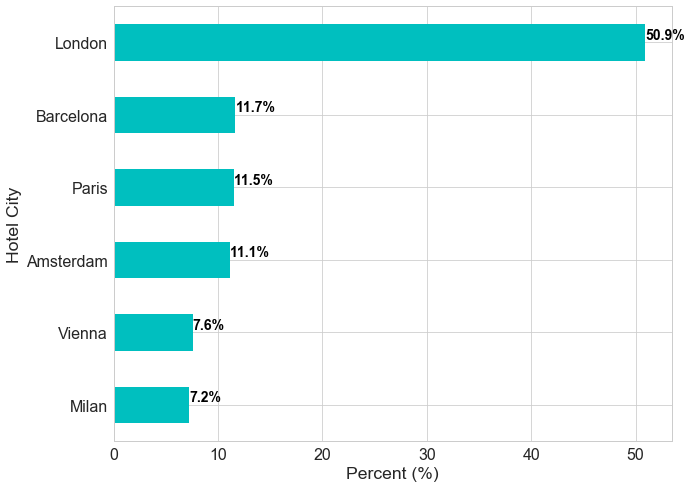

In [10]:
htl_city=(htl.Hotel_City.value_counts(normalize=True)[::-1]*100)
ax=htl_city.plot(kind='barh',rot=0,color='c')
for idx, val in enumerate(htl_city):
    ax.text( val,idx+0.05,str(round(val,1))+'%', color='black', fontweight='bold',fontsize=14)
plt.xlabel('Percent (%)')
plt.ylabel('Hotel City');

Over 50% of the reviews are for hotels in London, United Kingdom; hotels from other countries (Spain, France, Netherlands, Austria, Italy) take around 11% or less in portion.

***Extract days from 'days_since_review'***

In [13]:
# Extract days from 'days_since_review' and convert it into integers
htl.days_since_review=htl.days_since_review.str.replace(r'[a-z]+','').astype('int')#findall(r'\d+')

In [14]:
htl.days_since_review.describe()

count    515212.000000
mean        354.400474
std         208.908943
min           0.000000
25%         175.000000
50%         353.000000
75%         527.000000
max         730.000000
Name: days_since_review, dtype: float64

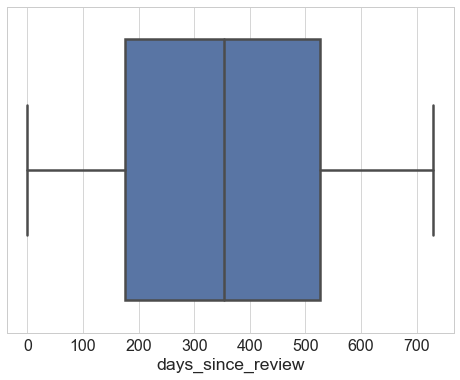

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(htl.days_since_review);

***Add month and day of review***

In [11]:
# Add month of review
import calendar

htl['Review_Month']=htl.index.month
htl['Review_Month']=htl['Review_Month'].apply(lambda x: calendar.month_abbr[x])

# Add day of review
htl['Review_Wday']=htl.index.weekday_name
htl['Review_Wday']=htl['Review_Wday'].apply(lambda x: x[:3])

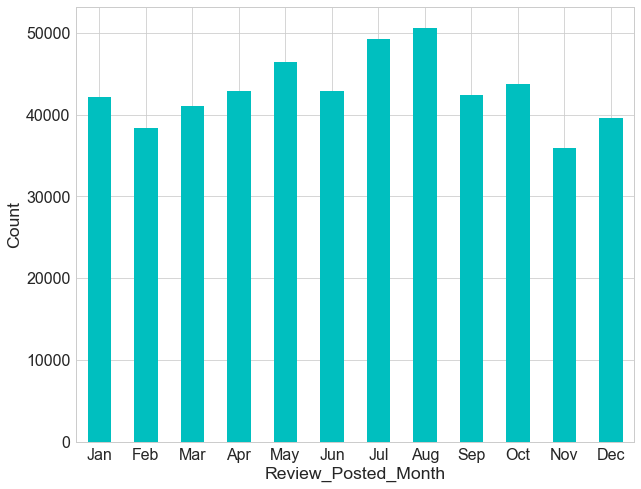

In [12]:
month=calendar.month_abbr[1:13]#[calendar.month_name[i][:3] for i in range(1,13)]
htl.Review_Month.value_counts().reindex(month).plot(kind='bar',color='c',rot=0)
plt.xlabel('Review_Posted_Month')
plt.ylabel('Count');


In [30]:
# Define a function to plot bars with annotation; s: a series, rot: rotation of xtick labels; xlab: xlabels
def plot_bar(s,xlab,rot=0):
    ax=s.plot(kind='bar',rot=rot,color='c')
    for i, v in enumerate(s):
        ax.text( i-0.1,v , str(round(v,1))+'%', color='black', fontweight='bold',fontsize=14)
    plt.xlabel(xlab)
    plt.ylabel('Percent (%)');


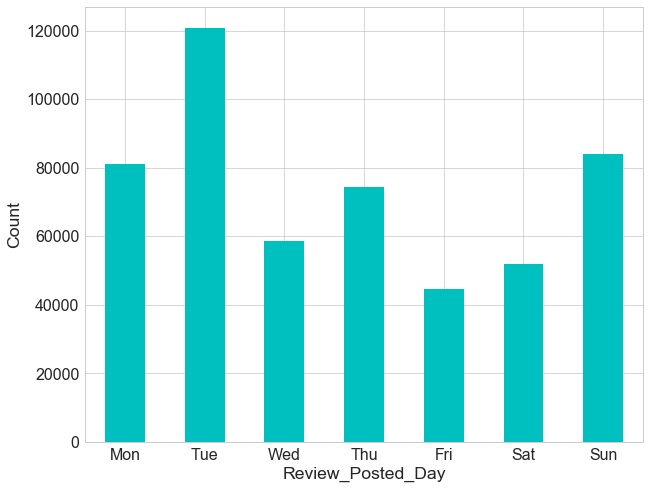

In [21]:
wday=[d[:3] for d in calendar.day_name[0:7]]

htl_wday=(htl.Review_Wday.value_counts(normalize=False)).reindex(wday)
htl_wday.plot(kind='bar',color='c',rot=0)
plt.xlabel('Review_Posted_Day')
plt.ylabel('Count');
plt.savefig('img/output_35_0.png')



Reviews posted on Tuesdays are the most among days of the week while reviews posted on Fridays are the least.

***Add 'Pos_Rev_WCRatio' and 'Neg_Rev_WCRatio'***

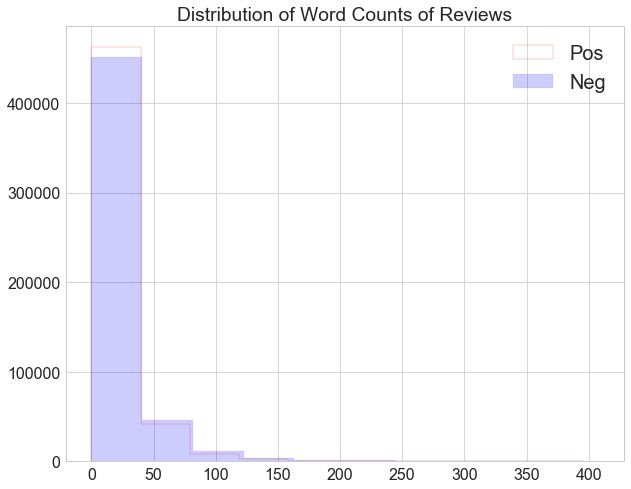

In [22]:
# Distribution of word counts in reviews
plt.hist(htl['Review_Total_Positive_Word_Counts'],alpha=0.8,histtype='step', stacked=True, fill=False,color='r',label='Pos')
plt.hist(htl['Review_Total_Negative_Word_Counts'],alpha=0.2,histtype='step', stacked=True, fill=True,color='b',label='Neg')
plt.legend(prop={'size':20})
plt.title('Distribution of Word Counts of Reviews');

In [23]:
# Observations that post neither positive words nor negative words
idx=(htl.Review_Total_Positive_Word_Counts==0) & (htl.Review_Total_Negative_Word_Counts==0)
idx.sum()

127

In [24]:
idx.sum()/len(htl)

0.00024650046970955643

127 reviews (0.02% of reviews) posted neither positive nor negative words, instead, just posted score for the hotel.

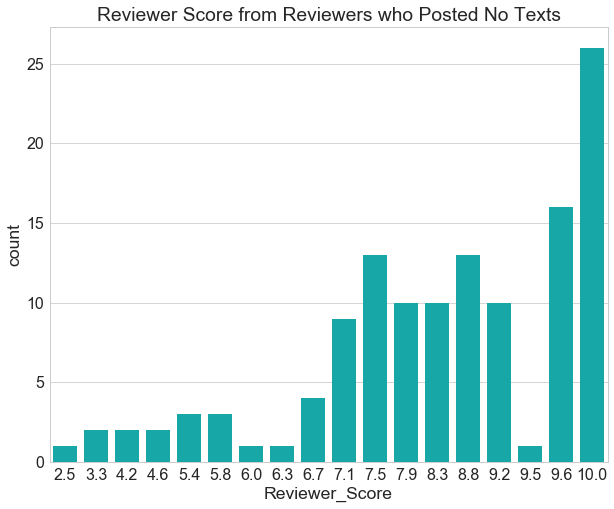

In [25]:
htl_soloscore=htl[(htl.Review_Total_Positive_Word_Counts==0) & (htl.Review_Total_Negative_Word_Counts==0)]
sns.countplot(x=htl_soloscore.Reviewer_Score,color='c')
plt.title('Reviewer Score from Reviewers who Posted No Texts');

Some reviewers don't say a word, but they're happy with the hotel and give high scores while some are very disappointed and give very low scores. 

In [26]:
# Add 'Pos_Rev_WCRatio' and 'Neg_Rev_WCRatio'
htl['Pos_Rev_WCRatio']=htl.Review_Total_Positive_Word_Counts/(htl.Review_Total_Positive_Word_Counts+htl.Review_Total_Negative_Word_Counts)
htl['Neg_Rev_WCRatio']=htl.Review_Total_Negative_Word_Counts/(htl.Review_Total_Positive_Word_Counts+htl.Review_Total_Negative_Word_Counts)

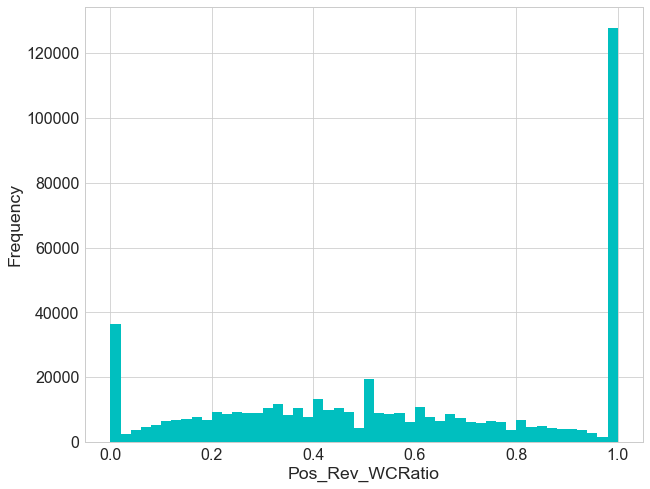

In [27]:
htl['Pos_Rev_WCRatio'].plot.hist(bins=50,color='c');
plt.xlabel('Pos_Rev_WCRatio');

'Pos_Rev_WCRatio' is defined by number of words in positive reviews divided by sum of number of words in both positive and negative reviews. 'Pos_Rev_WCRatio' close to zero means that reviewers posted negative words and rarely positive words;  Pos_Rev_WCRatio' close to 1 indicates that reviewers are very satisfied.

**Extract features from 'Tag'**

In [28]:
htl.Tags.sample(5)

Review_Date
2015-09-13    [' Business trip ', ' Group ', ' Single Room '...
2017-05-13    [' Leisure trip ', ' Family with young childre...
2015-11-03    [' Leisure trip ', ' Family with older childre...
2016-08-07    [' Leisure trip ', ' Couple ', ' Classic Doubl...
2016-03-13    [' Leisure trip ', ' Couple ', ' Deluxe Double...
Name: Tags, dtype: object

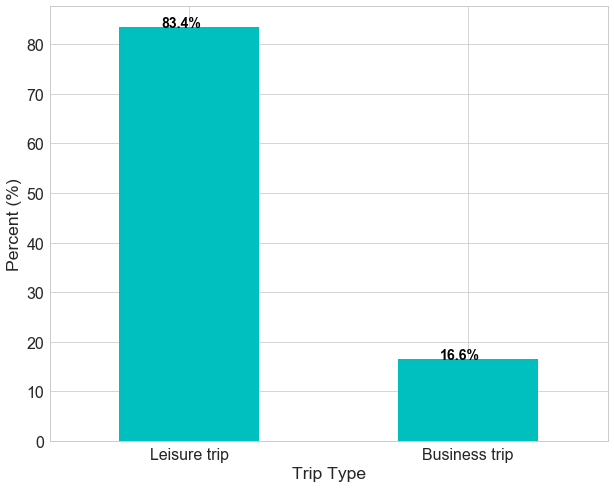

In [31]:
# Trip type: business or leisure
htl['Trip_Type']=htl.Tags.str.extract('(\w+ trip)',expand=True)

# Visualization of trip type
htl_ttype=htl.Trip_Type.value_counts(normalize=True)*100

plot_bar(htl_ttype,'Trip Type')

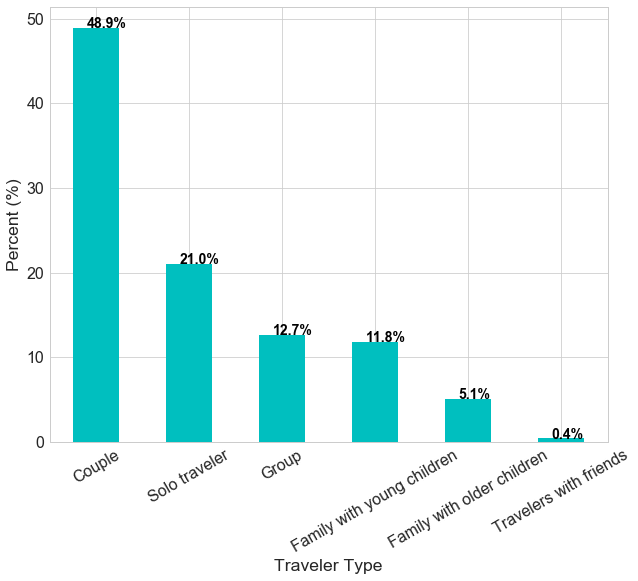

In [32]:
# Extract traveler type
htl['Traveler_Type']=htl.Tags.str.findall('Couple|Solo traveler|Group|Family with young children|Family with older children|Travelers with friends').apply(lambda x: x[0])

# Visualize traveler type
htl_traveler_type=htl.Traveler_Type.value_counts(normalize=True)*100
plot_bar(htl_traveler_type,'Traveler Type',30)


Most of travelers are couples or solo travelers. 

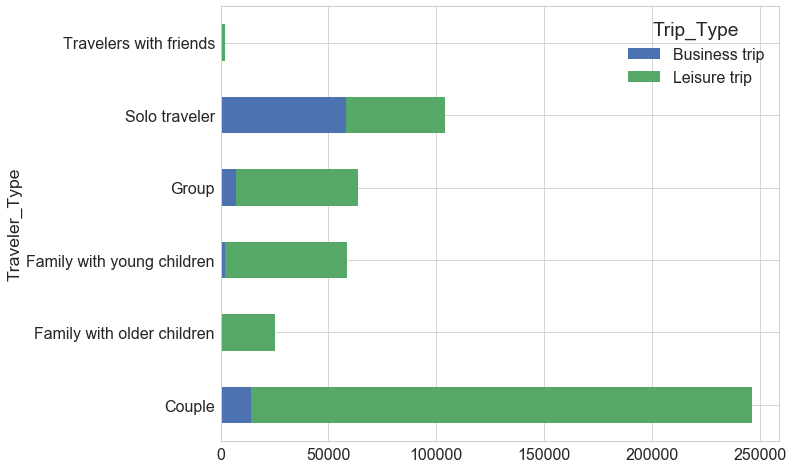

In [33]:
htl.groupby(['Traveler_Type','Trip_Type'])['Traveler_Type'].count().unstack().plot(kind='barh',stacked=True);

Over half of solo travelers stayed in hotels due to business trip otherwise majority of travelers stayed in hotels due to leisure trip.

In [34]:
# Extract nights travelers stayed 
htl['Num_Nights']=htl.Tags.str.extract('(Stayed \d+ \w+)', expand=True)
htl['Num_Nights']=htl['Num_Nights'].str.extract('(\d+)', expand=True) 

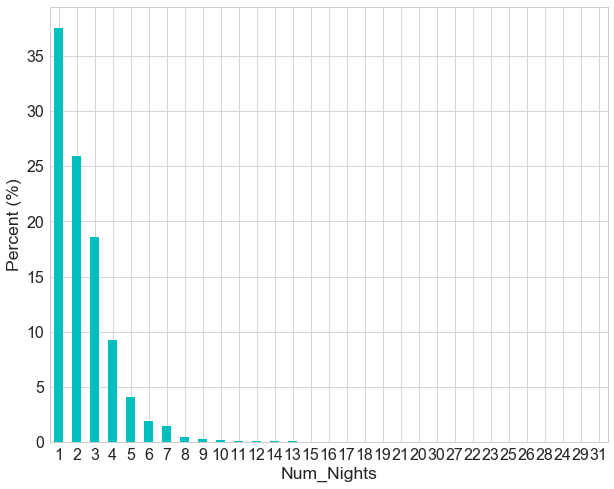

In [35]:
htl_nnight=htl.dropna(subset=['Num_Nights']).Num_Nights.astype('int').value_counts(normalize=True)*100
htl_nnight.plot(kind='bar',rot=0,logy=False,color='c')
plt.xlabel('Num_Nights')
plt.ylabel('Percent (%)');

Most of travelers stayed less than a week in hotels and only very few stayed around a month in a hotel.

In [36]:
htl_clean=htl.drop(['Tags'],axis=1)

In [37]:

htl_clean=htl_clean[['Review_Month', 'Review_Wday','Hotel_Name','Hotel_Address', 'Hotel_City', 'lat', 'lng', 'Average_Score','Total_Number_of_Reviews',
             'Reviewer_Nationality', 'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score',
             'Negative_Review','Review_Total_Negative_Word_Counts', 'Neg_Rev_WCRatio',
             'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Pos_Rev_WCRatio',
             'Trip_Type', 'Traveler_Type', 'Num_Nights','Additional_Number_of_Scoring','days_since_review']]

**Fix 'Hotel_Name' and 'Hotel_Address'**

In [38]:
htl_clean.select_dtypes(include='object').describe()

Review_Month Review_Wday                                  Hotel_Name  \
count        515212      515212                                      515212   
unique           12           7                                        1492   
top             Aug         Tue  Britannia International Hotel Canary Wharf   
freq          50615      120823                                        4789   

                                            Hotel_Address Hotel_City  \
count                                              515212     515212   
unique                                               1493          6   
top     163 Marsh Wall Docklands Tower Hamlets London ...     London   
freq                                                 4789     262298   

       Reviewer_Nationality Negative_Review Positive_Review     Trip_Type  \
count                515212          515212          515212        500208   
unique                  227          330011          412601             2   
top         United Kingdom      No Negative     No Positive  Leisure trip   
freq                 245110          127757           35904        417355   

       Traveler_Type Num_Nights days_since_review  
count         515212     515020            515212  
unique             6         31               731  
top           Couple          1            1 days  
freq          252005     193497              2584

There are 515212 reviews for hotels located in 6 cities of 6 countries in Europe by reviewers either on leisure trip or business trip from 227 distinct countries. Couples are the most common travelers types among the 6 types. 

Notice that there are 1492 unique hotel names but with 1493 hotel addresses. Let's find out which hotel name has multiple addresses.

In [39]:
h_addr_name=htl_clean[['Hotel_Address','Hotel_Name']].drop_duplicates(keep='first')
h_addr_name.Hotel_Name[h_addr_name.Hotel_Name.duplicated()]

Review_Date
2017-07-31    Hotel Regina
2017-06-01    Hotel Regina
Name: Hotel_Name, dtype: object

In [40]:
h_addr_name[h_addr_name.Hotel_Name=='Hotel Regina'].Hotel_Address.unique()

array(['Bergara 2 4 Eixample 08002 Barcelona Spain',
       'Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria',
       'Via Cesare Correnti 13 Milan City Center 20123 Milan Italy'],
      dtype=object)

Indeed one hotel named 'Hotel Regina' is located in Barcelona and one with the same name but located in Vienna and another one located in Milan. Is there any hotel address with multiple names?

In [37]:
addr_dup=h_addr_name.Hotel_Address[h_addr_name.Hotel_Address.duplicated()]
h_addr_name[h_addr_name.Hotel_Address==addr_dup.values[0]].Hotel_Name.unique()

array(['The Grand at Trafalgar Square',
       'Club Quarters Hotel Trafalgar Square'], dtype=object)

In [ ]:
# htl[htl.Hotel_Name=='Club Quarters Hotel Trafalgar Square'].index.value_counts().sort_index()
# htl[htl.Hotel_Name=='The Grand at Trafalgar Square'].index.value_counts().sort_index()

On the other hand, two hotels ('The Grand at Trafalgar Square' and 'Club Quarters Hotel Trafalgar Square') are located in the same location. Perhaps they are the same hotel that changed name?

We've checked that there are reviews from 2015 to 2017 for both hotels with different average score, so it's indeed reviewed as two distinct hotels. When we count hotels in the following, we will distinguish 'Hotel_Address' for those two hotels on purpose to avoid mismatching problems.

In [41]:
htl_clean.loc[htl_clean.Hotel_Name=='The Grand at Trafalgar Square','Hotel_Address']=htl_clean[htl_clean.Hotel_Name=='The Grand at Trafalgar Square'].Hotel_Address+' GTS'
htl_clean.loc[htl_clean.Hotel_Name=='Club Quarters Hotel Trafalgar Square','Hotel_Address']=htl_clean[htl_clean.Hotel_Name=='Club Quarters Hotel Trafalgar Square'].Hotel_Address+' CQHTS'

In [43]:
#Save cleaned data
#htl_clean.to_csv('data/htl_clean.csv')

### Summary

In summary,

* we've added month and weekday that reviews are posted and we found that reviewers posted most reviews during July and August and reviews are most posted on Tuesday and lest on Friday.

* We've extracted the city where hotels are located and find that over a half of hotels are located in London.
* We've also extracted trip type ('Leisure trip', 'Business trip'), traveler type ('Couple', 'Solo traveler', 'Group', ...) and number of nights in hotels for 'Tags'. We found that around 80% of the reviews is for leisure trip and 20% for business trip. Around 50% of travelers are couples and around 20% are solo travelers, others are groups, families or friends. Majority of travels stayed in hotel for less than a week and some stayed longer till a month. 

In next section, we will perform exploratory data analysis and gain insights on how those features are correlated with review scores. 

## Exploratory Data Analysis

### Summary Statistics

In [42]:
# Overview of cleaned data frame htl_clean
htl_clean.info()
htl_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515212 entries, 2017-08-03 to 2015-08-09
Data columns (total 23 columns):
Review_Month                                  515212 non-null object
Review_Wday                                   515212 non-null object
Hotel_Name                                    515212 non-null object
Hotel_Address                                 515212 non-null object
Hotel_City                                    515212 non-null object
lat                                           511944 non-null float64
lng                                           511944 non-null float64
Average_Score                                 515212 non-null float64
Total_Number_of_Reviews                       515212 non-null int64
Reviewer_Nationality                          515212 non-null object
Total_Number_of_Reviews_Reviewer_Has_Given    515212 non-null int64
Reviewer_Score                                515212 non-null float64
Negative_Review                            

Review_Month Review_Wday                           Hotel_Name  \
Review_Date                                                                 
2017-05-25           May         Thu        IH Hotels Milano Ambasciatori   
2016-12-12           Dec         Mon                   Le Meridien Vienna   
2016-03-08           Mar         Tue  Hotel Scribe Paris Opera by Sofitel   
2015-12-22           Dec         Tue                  Das Opernring Hotel   
2016-08-29           Aug         Mon                    Platine Hotel Spa   

                                                 Hotel_Address Hotel_City  \
Review_Date                                                                 
2017-05-25   Galleria Del Corso 3 Milan City Center 20122 M...      Milan   
2016-12-12   Robert Stolz Platz 1 01 Innere Stadt 1010 Vien...     Vienna   
2016-03-08             1 Rue Scribe 9th arr 75009 Paris France      Paris   
2015-12-22    Opernring 11 01 Innere Stadt 1010 Vienna Austria     Vienna   
2016-08-29   20 rue de l Ing nieur Robert Keller 15th arr 7...      Paris   

                   lat        lng  Average_Score  Total_Number_of_Reviews  \
Review_Date                                                                 
2017-05-25   45.464435   9.195273            7.8                     2387   
2016-12-12   48.202730  16.366121            8.3                     2393   
2016-03-08   48.870418   2.329683            8.6                      705   
2015-12-22   48.202645  16.367105            8.9                     1267   
2016-08-29   48.847346   2.283241            8.6                      729   

            Reviewer_Nationality  Total_Number_of_Reviews_Reviewer_Has_Given  \
Review_Date                                                                    
2017-05-25         Saudi Arabia                                            1   
2016-12-12              Austria                                           35   
2016-03-08         South Africa                                            1   
2015-12-22              Croatia                                            1   
2016-08-29              Denmark                                            4   

             Reviewer_Score  \
Review_Date                   
2017-05-25             10.0   
2016-12-12              8.8   
2016-03-08             10.0   
2015-12-22              8.8   
2016-08-29             10.0   

                                               Negative_Review  \
Review_Date                                                      
2017-05-25                    The air conditioning is very bad   
2016-12-12    Layout of breakfast challenging to reach the ...   
2016-03-08                       More choice in the cafe menu    
2015-12-22                                         No Negative   
2016-08-29                                         No Negative   

             Review_Total_Negative_Word_Counts  Neg_Rev_WCRatio  \
Review_Date                                                       
2017-05-25                                   7         1.000000   
2016-12-12                                  29         0.630435   
2016-03-08                                   8         0.421053   
2015-12-22                                   0         0.000000   
2016-08-29                                   0         0.000000   

                                               Positive_Review  \
Review_Date                                                      
2017-05-25                                         No Positive   
2016-12-12    Check in great bar cool with DJ breakfast sel...   
2016-03-08    The staff were friendly Room was always done ...   
2015-12-22    Great location the staff was really friendly ...   
2016-08-29    Really cool hotel with a good location in a n...   

             Review_Total_Positive_Word_Counts  Pos_Rev_WCRatio  \
Review_Date                                                       
2017-05-25                                   0         0.000000   
2016-12-12      

**Summary statistics of 'object' columns**

In [43]:
htl_clean.select_dtypes(include='object').describe()

Review_Month Review_Wday                                  Hotel_Name  \
count        515212      515212                                      515212   
unique           12           7                                        1492   
top             Aug         Tue  Britannia International Hotel Canary Wharf   
freq          50615      120823                                        4789   

                                            Hotel_Address Hotel_City  \
count                                              515212     515212   
unique                                               1494          6   
top     163 Marsh Wall Docklands Tower Hamlets London ...     London   
freq                                                 4789     262298   

       Reviewer_Nationality Negative_Review Positive_Review     Trip_Type  \
count                515212          515212          515212        500208   
unique                  227          330011          412601             2   
top         United Kingdom      No Negative     No Positive  Leisure trip   
freq                 245110          127757           35904        417355   

       Traveler_Type Num_Nights days_since_review  
count         515212     515020            515212  
unique             6         31               731  
top           Couple          1            1 days  
freq          252005     193497              2584

**Summary statistics of numeric columns**

In [44]:
htl_clean.select_dtypes(exclude='object').describe()

lat            lng  Average_Score  Total_Number_of_Reviews  \
count  511944.000000  511944.000000  515212.000000            515212.000000   
mean       49.443040       2.824222       8.397767              2744.698889   
std         3.468029       4.581637       0.547952              2318.090821   
min        41.328376      -0.369758       5.200000                43.000000   
25%        48.214277      -0.143649       8.100000              1161.000000   
50%        51.499981      -0.000250       8.400000              2134.000000   
75%        51.516288       4.834443       8.800000              3633.000000   
max        52.400181      16.429233       9.800000             16670.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               515212.000000   515212.000000   
mean                                     7.164895        8.395532   
std                                     11.039354        1.637467   
min                                      1.000000        2.500000   
25%                                      1.000000        7.500000   
50%                                      3.000000        8.800000   
75%                                      8.000000        9.600000   
max                                    355.000000       10.000000   

       Review_Total_Negative_Word_Counts  Neg_Rev_WCRatio  \
count                      515212.000000    515085.000000   
mean                           18.540822         0.434377   
std                            29.693991         0.336903   
min                             0.000000         0.000000   
25%                             2.000000         0.033333   
50%                             9.000000         0.457627   
75%                            23.000000         0.710526   
max                           408.000000         1.000000   

       Review_Total_Positive_Word_Counts  Pos_Rev_WCRatio  \
count                      515212.000000    515085.000000   
mean                           17.778256         0.565623   
std                            21.804541         0.336903   
min                             0.000000         0.000000   
25%                             5.000000         0.289474   
50%                            11.000000         0.542373   
75%                            22.000000         0.966667   
max                           395.000000         1.000000   

       Additional_Number_of_Scoring  
count                 515212.000000  
mean                     498.416021  
std                      500.668595  
min                        1.000000  
25%                      169.000000  
50%                      342.000000  
75%                      660.000000  
max                     2682.000000

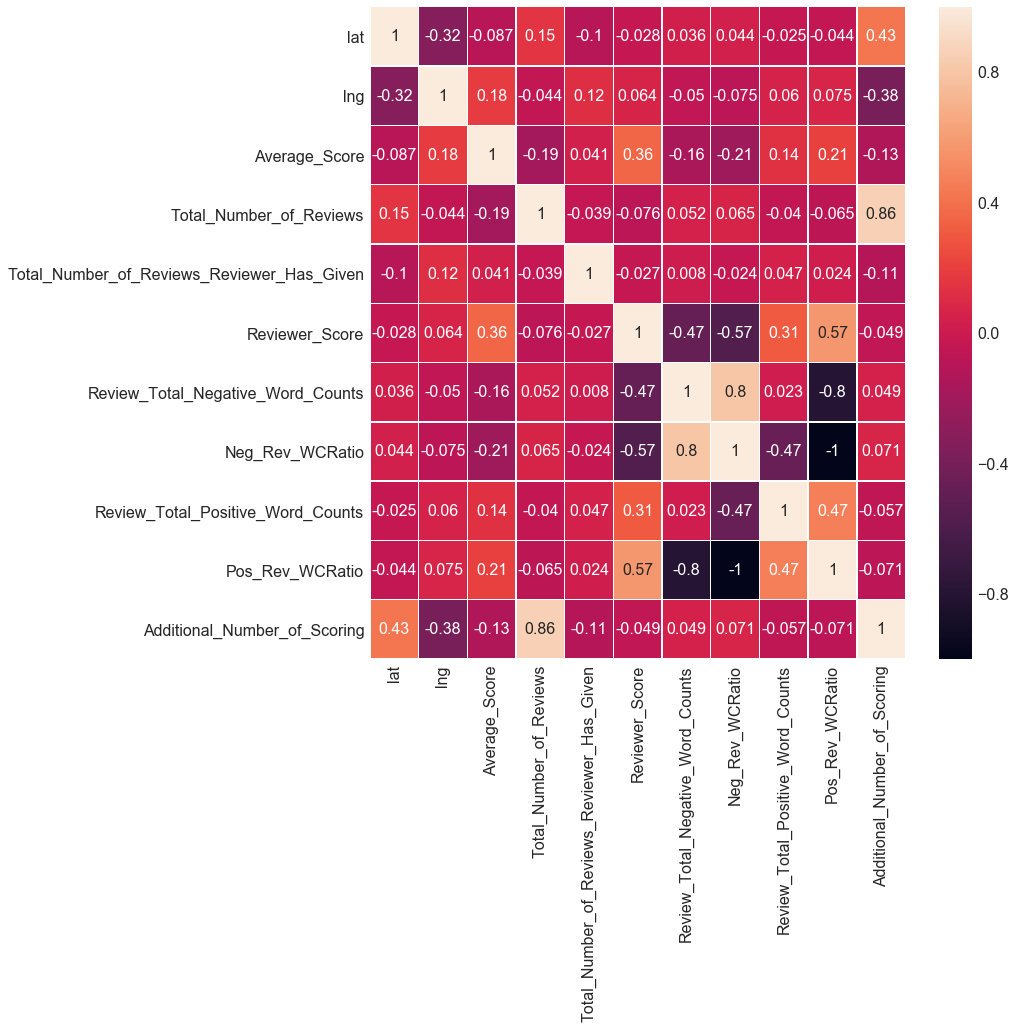

In [45]:
plt.figure(figsize=(12,12))
corr=htl_clean.select_dtypes(exclude='object').corr(method='spearman')
sns.heatmap(corr,annot=True,linewidths=0.4,annot_kws={'size':16});

The heat map above displays the correlation matrix of numerical columns in the data frame. It gives us some hints on to what extent those features are correlated with each other. Take the 'Reviewer_Score' for instance, its correlation with features such as "Review_Total_Positive_Word_counts","Pos_Rev_WCRatio" and "Review_Total_Negative_Word_counts","Neg_Rev_WCRatio" is significant. It's highly positively correlated with 'Average_Score', "Review_Total_Positive_Word_counts","Pos_Rev_WCRatio" as the more positive words reviewers posted, the happier they might be with the hotels hence the higher score they rated the hotels. On the contrary, 'Reviewer_Score' is highly negatively correlated with "Review_Total_Negative_Word_counts","Neg_Rev_WCRatio" as expected since the longer negative reviews indicated more complains hence lower scores. Since the correlation of 'days_since_review' with other features are very small, we can drop this feature in the following analysis. 

### Visualization of Hotels

#### Visualize Hotels on a Map

In [43]:
# Select columns that will display on a map
cols=['Hotel_Address','Hotel_Name','Total_Number_of_Reviews','Average_Score','lat','lng']

#Drop rows with missing lat and lng and drop duplicates
htl_map=htl_clean.dropna(subset=['lat'])[cols].drop_duplicates(keep='first').reset_index(drop=True)#drop index as a new column

# Number of nations of reviewers that reviewed the hotel
htl_rewer=pd.crosstab(htl_clean.dropna(subset=['lat']).Hotel_Address,htl.dropna(subset=['lat']).Reviewer_Nationality,margins=True).reset_index()
htl_map['Num_RevNations']=(htl_rewer.iloc[:-1,1:-1]!=0).sum(axis=1).sort_index()


htl_map.info()
htl_map.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 7 columns):
Hotel_Address              1477 non-null object
Hotel_Name                 1477 non-null object
Total_Number_of_Reviews    1477 non-null int64
Average_Score              1477 non-null float64
lat                        1477 non-null float64
lng                        1477 non-null float64
Num_RevNations             1477 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 80.9+ KB


Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1  1 15 Templeton Place Earl s Court Kensington a...   
2  1 2 Serjeant s Inn Fleet Street City of London...   
3  1 3 Queens Garden Westminster Borough London W...   
4    1 3 Rue d Argentine 16th arr 75116 Paris France   

                         Hotel_Name  Total_Number_of_Reviews  Average_Score  \
0                       Hotel Arena                     1403            7.7   
1                  K K Hotel George                     1831            8.5   
2           Apex Temple Court Hotel                     2619            9.2   
3  The Park Grand London Paddington                     4380            7.7   
4               Monhotel Lounge SPA                      171            8.4   

         lat       lng  Num_RevNations  
0  52.360576  4.915968              46  
1  51.491888 -0.194971              59  
2  51.513734 -0.108751              53  
3  51.514218 -0.180903              84  
4  48.874348  2.289733              16

**Make a heatmap in order to see where the most hotels are located**

In [44]:
from folium import plugins
  
hotels_heatmap = folium.Map(location=[htl_map['lat'].mean(), htl_map['lng'].mean()], zoom_start=5)
hotels_heatmap.add_child(plugins.HeatMap([[row["lat"], row["lng"]] for name, row in htl_map.iterrows()]))
hotels_heatmap.save('img/hotels_heatmap.html')
hotels_heatmap

In [45]:
#Setup a map centered on the center
hotels_map = folium.Map(location=[htl_map['lat'].mean(), htl_map['lng'].mean()], zoom_start=5)

# Add clusters to the map
from folium.plugins import MarkerCluster
mc = MarkerCluster().add_to(hotels_map)

for name, row in htl_map.iterrows():
    folium.Marker([row["lat"], row["lng"]], popup="<strong>Hotel Name: </strong>{0}<br> <strong>Average_Score: </strong>{1}<br> <strong>Tot_Num_Reviews: </strong>{2}<br>  <strong>Reviewed by Num_Nations: </strong>{3}".format(row["Hotel_Name"],row["Average_Score"],row['Total_Number_of_Reviews'],row['Num_RevNations'])).add_to(mc)

hotels_map.save('img/hotels_map.html')
#Display map
hotels_map


![title](img/hotel.png)
For an interactive visualization, click [here](https://houhouhotel.herokuapp.com/index.html)

#### Who Are the Most Popular Hotels?

We determine the most popular hotels by considering its 'Average_Score' and 'Total_Number_of_Reviews'. That is the 'Total_Number_of_Reviews' should be more than a threshold so that hotels with few number of reviews but high score won't be considered as popular. We then rank hotels by its average score.

In [46]:
# Create a data frame of hotels including its average score and total number of reviews
htl_score_nrev=htl_clean[['Hotel_Name','Hotel_City','Average_Score','Total_Number_of_Reviews','lat','lng']].drop_duplicates()

htl_score_nrev.Total_Number_of_Reviews.describe()
#np.percentile(htl_score_nrev.Total_Number_of_Reviews,80)

count     1494.000000
mean      1297.222222
std       1371.420726
min         43.000000
25%        422.000000
50%        867.000000
75%       1670.250000
max      16670.000000
Name: Total_Number_of_Reviews, dtype: float64

In [47]:
# Set a threshold for the total number of reviews to avoid hotels with few reviews but high scores being considered as popular hotels
thresh=htl_score_nrev.Total_Number_of_Reviews.median()
htl_pop=htl_score_nrev[htl_score_nrev.Total_Number_of_Reviews>thresh].sort_values(['Average_Score','Total_Number_of_Reviews'])[::-1][:10]
htl_pop

Hotel_Name Hotel_City  \
Review_Date                                                              
2017-08-03                   Intercontinental London The O2     London   
2017-08-02             Shangri La Hotel at The Shard London     London   
2017-08-03                           Catalonia Square 4 Sup  Barcelona   
2017-07-27              Best Western Premier Kaiserhof Wien     Vienna   
2017-07-27   Excelsior Hotel Gallia Luxury Collection Hotel      Milan   
2017-07-31                                  Hotel Palace GL  Barcelona   
2017-07-25                             Catalonia Magdalenes  Barcelona   
2017-07-11                                        The Savoy     London   
2017-07-11                                  Rosewood London     London   
2017-07-30                            The Guesthouse Vienna     Vienna   

             Average_Score  Total_Number_of_Reviews        lat        lng  
Review_Date                                                                
2017-08-03             9.4                     4204  51.502435  -0.000250  
2017-08-02             9.4                     2200  51.504497  -0.085556  
2017-08-03             9.4                     1711  41.388566   2.171299  
2017-07-27             9.4                     1353  48.197550  16.368640  
2017-07-27             9.4                     1345  45.485703   9.202013  
2017-07-31             9.4                     1266  41.391626   2.171638  
2017-07-25             9.4                     1108  41.386128   2.174529  
2017-07-11             9.4                     1021  51.511192  -0.119401  
2017-07-11             9.4                     1008  51.517330  -0.118097  
2017-07-30             9.4                      951  48.205130  16.369036

In [53]:
htl_pop.Hotel_City.value_counts()

London       4
Barcelona    3
Vienna       2
Milan        1
Name: Hotel_City, dtype: int64

**Make a bubble map with radium representing the number reviews**

In [48]:
# Make a bubble map with radium representing the number reviewes
import folium

htl_bubblemap = folium.Map(location=[htl_pop['lat'].mean(),htl_pop['lng'].mean()], zoom_start=5)

for name, row in htl_pop.iterrows():
    folium.Circle(location=[row["lat"], row["lng"]],
                  popup="<strong>Hotel: {0}</strong><br> <strong>Average_Score: {1}</strong><br> Num_of_Reviews: {2}</strong><br>".format(row['Hotel_Name'],row['Average_Score'],row['Total_Number_of_Reviews']),
                  radius=row['Total_Number_of_Reviews']*20,
                  color='red').add_to(htl_bubblemap) 

htl_bubblemap.save('img/htl_bubblemap.html')
htl_bubblemap


Among the top 10 most popular hotels, 4 are located in London and 3 in Barcelona, 2 in Milan and only 1 in Vienna.

#### Visualize Average Score of Hotels


In [48]:
htl_clean.Average_Score.describe()

count    515212.000000
mean          8.397767
std           0.547952
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

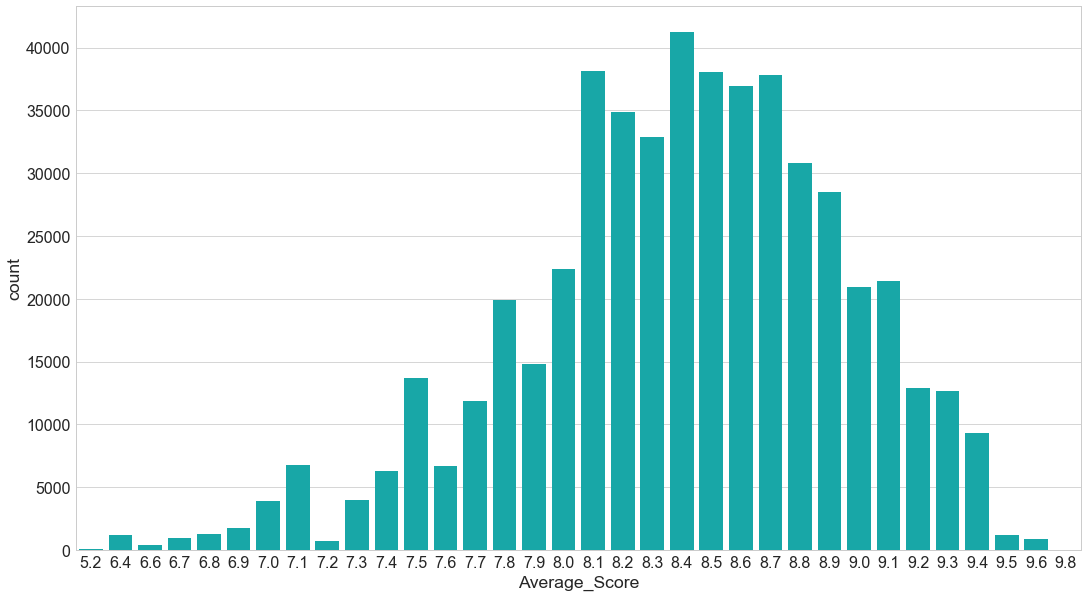

In [49]:
plt.figure(figsize=(18,10))
sns.countplot(x='Average_Score',data=htl_clean,color='c');

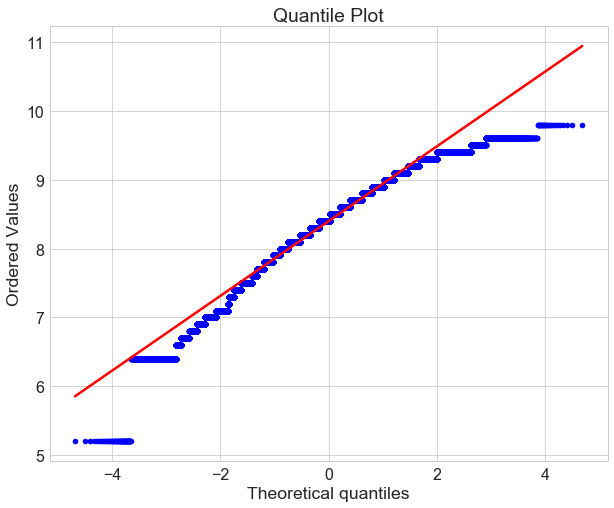

In [51]:
#Normmal test
from scipy import stats
_,fit=stats.probplot(htl_clean.Average_Score,dist=stats.norm,plot=plt)
plt.title('Quantile Plot');

The average score is above 5 and its mean is 8.4. 

##### Any Trends in Average Score of Hotels
All average scores are above 5 and its mean is at 8.4. We will explore if there is any trend in average score below by time series analysis.

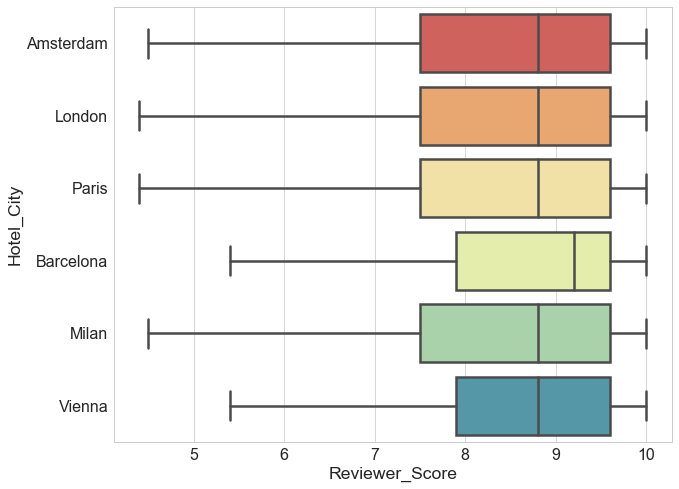

In [52]:
sns.boxplot(y="Hotel_City",x="Reviewer_Score",data=htl_clean,showfliers=False,palette='Spectral',orient='h');

In [50]:
# Group by hotel city
city_data=htl_clean.groupby(['Review_Date','Hotel_City'])['Reviewer_Score'].mean().unstack()
city_data.head()


Hotel_City   Amsterdam  Barcelona    London     Milan     Paris    Vienna
Review_Date                                                              
2015-08-04    8.604800   8.498561  8.234853  8.245783  8.157485  8.759302
2015-08-05    8.229268   8.687500  8.213953  7.988889  8.135484  8.441304
2015-08-06    8.432979   8.771930  8.204050  7.830645  7.870588  8.398571
2015-08-07    8.593103   8.308889  8.266667  8.325714  8.353571  8.765789
2015-08-08    8.422000   8.715217  8.312903  7.980769  8.460494  8.258000

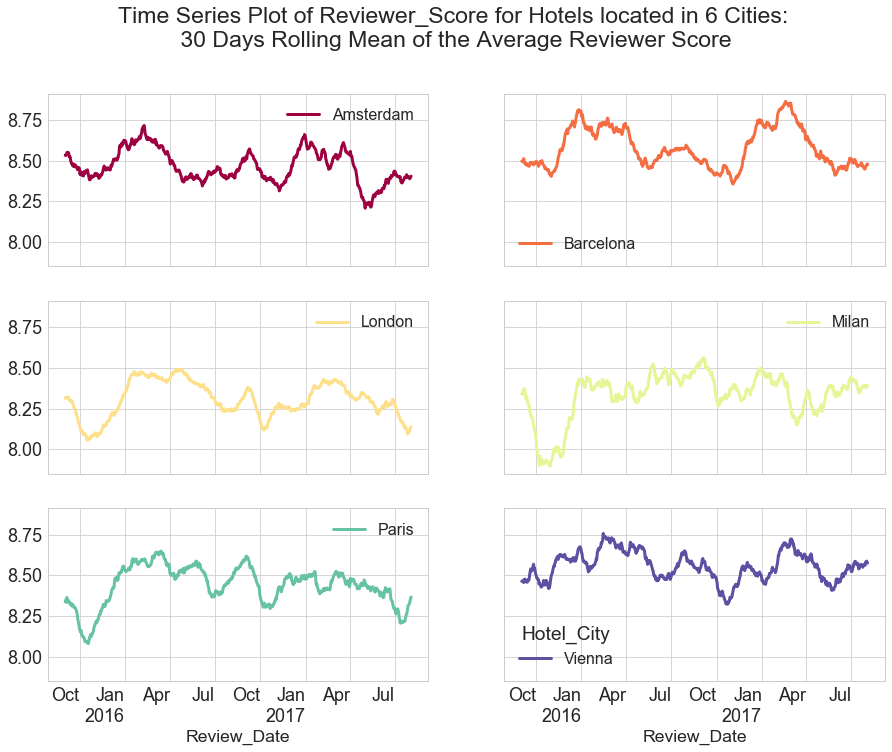

In [99]:
city_data.rolling(window=30).mean().plot(subplots=True,layout=(3,2), linewidth=3, title='Time Series Plot of Reviewer_Score for Hotels located in 6 Cities:\n 30 Days Rolling Mean of the Average Reviewer Score',cmap='Spectral',figsize=(15,12),sharey=True,rot=0,fontsize=18)
plt.legend(fontsize='small',title='Hotel_City',loc='best')
plt.savefig('img/output_100_0.png');

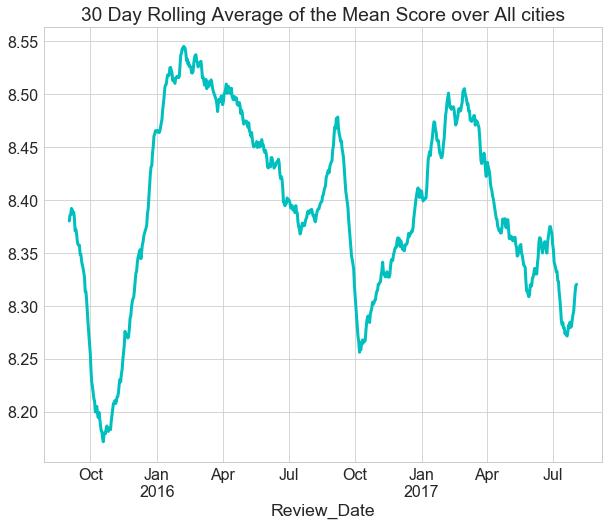

In [115]:
ax=htl_clean.groupby(['Review_Date'])['Reviewer_Score'].mean().rolling(window=30).mean().plot(linewidth=3,linestyle='-',color='c',figsize=(10,8))
ax.set_title('30 Day Rolling Average of the Mean Score over All cities')
plt.savefig('img/output_101_0.png');

The average reviewer score of hotels is higher in January and low in October.

##### What Features are Affecting Reviewer Score?

**Distribution of Reviewer Score**

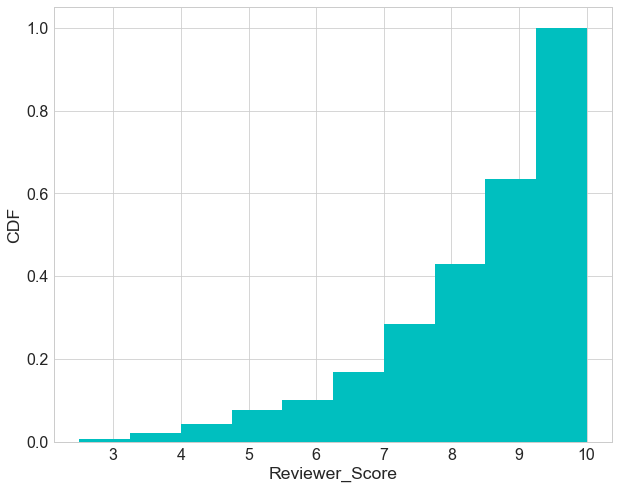

In [129]:
htl_clean.Reviewer_Score.plot(kind='hist', cumulative=True,histtype='bar',normed=True,bins=10,color='c')
plt.xlabel('Reviewer_Score')
plt.ylabel('CDF')
plt.savefig('img/output_105_0.png');

###### 'Trip_Type' v.s. 'Reviewer_Score'

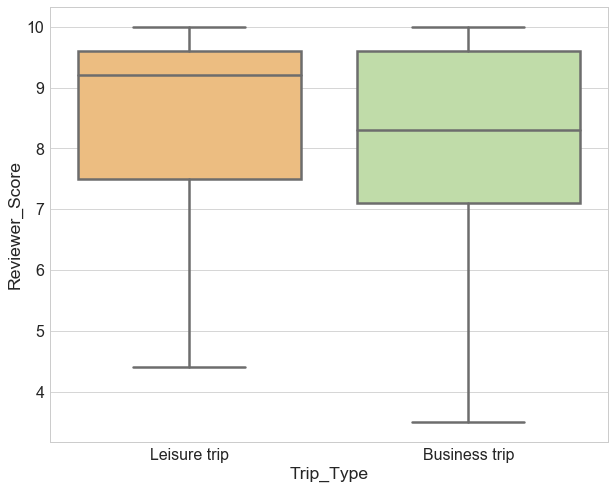

In [58]:
sns.boxplot(x='Trip_Type',y='Reviewer_Score',data=htl_clean,showfliers=False,palette='Spectral');

Reviewers on a leisure trip tend to rate higher than those on a business trip. It would be interesting to investigate what topics reviewers on leisure trip and business trip are content or complaining about.

###### 'Traveler_Type' v.s. 'Reviewer_Score'

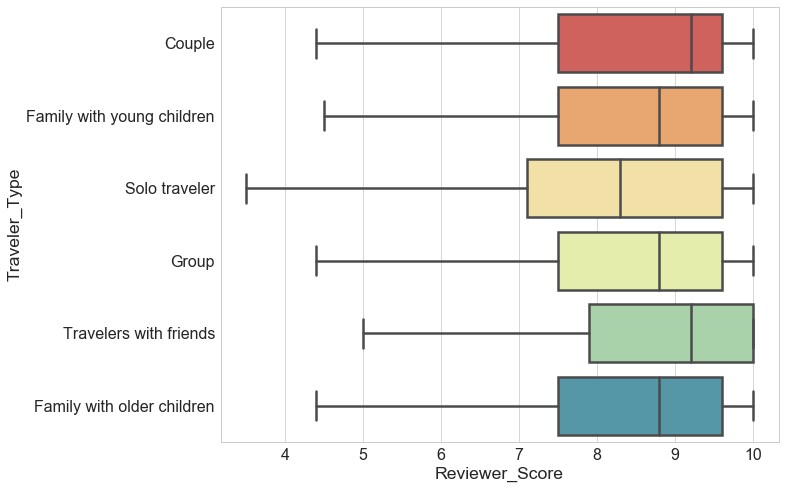

In [59]:
sns.boxplot(y='Traveler_Type',x='Reviewer_Score',data=htl,showfliers=False,palette='Spectral',orient='h');

'Solo traveler' tends to rate lowly while couples tend to rate highly.

In [60]:
htl_trip_traveler=htl_clean.dropna(subset=['Trip_Type','Traveler_Type'])
htl_tt_revs=htl_trip_traveler.groupby(['Traveler_Type','Trip_Type'])['Reviewer_Score'].mean().unstack()

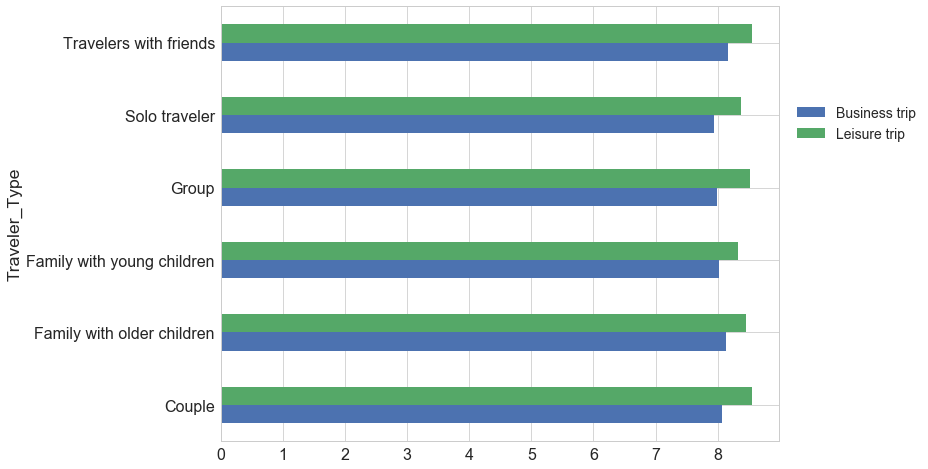

In [61]:
htl_tt_revs.plot(kind='barh',stacked=False)
plt.legend(bbox_to_anchor=(1.01, 0.8), fontsize=14);

###### How is 'Num_Nights' affecting reviewer score?

In [62]:
htl_numnight=htl_clean[['Num_Nights','Reviewer_Score']].dropna(subset=['Num_Nights'])
htl_numnight.Num_Nights=htl_numnight.Num_Nights.astype('int')
htl_nn_revs=htl_numnight.groupby(['Num_Nights'])['Reviewer_Score'].mean().to_frame().reset_index()
htl_nn_revs=htl_nn_revs.sort_values('Num_Nights')

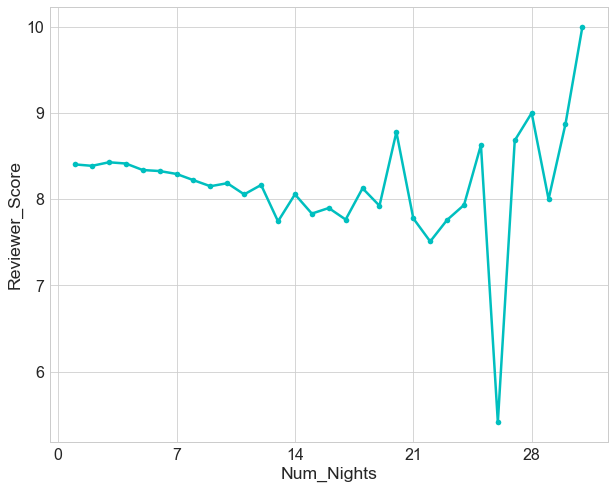

In [47]:
# plt.plot(htl_nn_revs.Num_Nights,htl_nn_revs.Reviewer_Score,'co-')
# plt.xticks(np.arange(0,31,7),['0','7','14','21','28'])
# plt.xlabel('Num_Nights')
# plt.ylabel('Reviewer_Score');

In [63]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

#Use py.plot() to return the unique url and optionally open the url.
# f=plotly.offline.plot({
#    "data": [go.Scatter(x=htl_nn_revs.Num_Nights, y=htl_nn_revs.Reviewer_Score)],
#    "layout": go.Layout(title="Reviewer_Score v.s. Num_Nights",xaxis={'title':'Num_Nights'}, yaxis={'title':'Reviewer_Score'})
# },filename='img/RevScore_v.s._NumNight.html',auto_open=False);

#Use py.iplot() when working in a Jupyter Notebook to display the plot in the notebook.
f=plotly.offline.iplot({
   "data": [go.Scatter(x=htl_nn_revs.Num_Nights, y=htl_nn_revs.Reviewer_Score)],
   "layout": go.Layout(title="Reviewer_Score v.s. Num_Nights",xaxis={'title':'Num_Nights'}, yaxis={'title':'Reviewer_Score'})
});



Since very few portion of travelers stayed in hotel for more than two weeks, if we focus on the range where 'Num_Nights'<14, the curve above indicates that on average the longer traveler stayed the lower the score they give. This can be visualized more clearly in next plot.

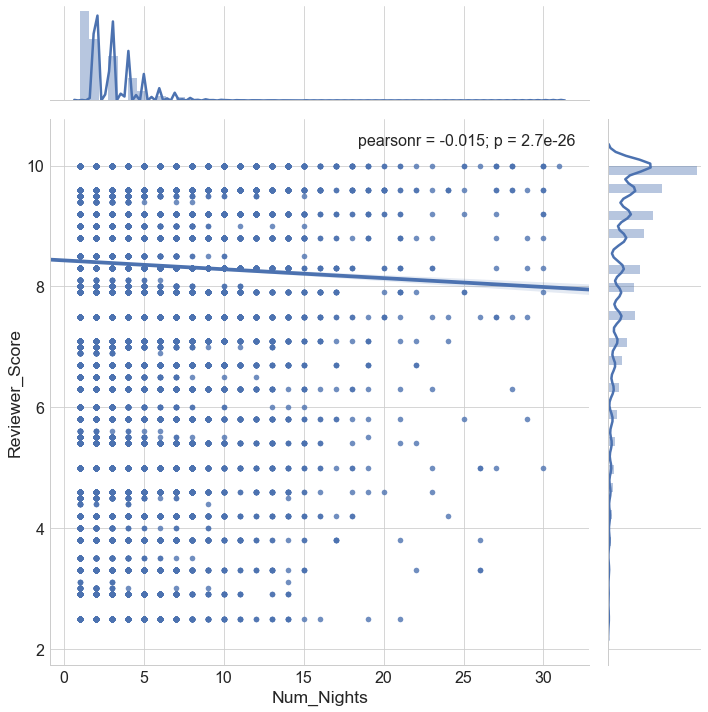

In [64]:
sns.jointplot(data=htl_numnight,y='Reviewer_Score',x='Num_Nights',kind="reg",size=10);

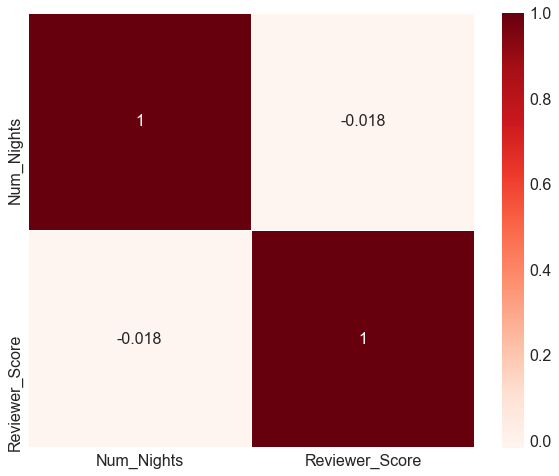

In [145]:
htl_numnight=htl_clean[['Num_Nights','Reviewer_Score']].dropna(subset=['Num_Nights'])
htl_numnight.Num_Nights=htl_numnight.Num_Nights.astype('int')



plt.figure(figsize=(10,8))
corr=htl_numnight.select_dtypes(exclude='object').corr(method='spearman')
sns.heatmap(corr,annot=True,linewidths=0.4,annot_kws={'size':16},cmap='Reds')
plt.savefig('img/output_119_0.png');

### Visualization of Reviewers

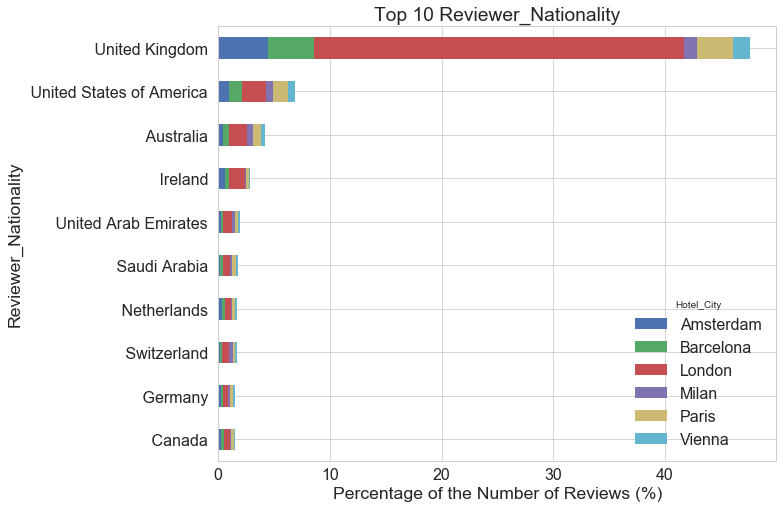

In [65]:
#Visualization of distribution of the top 10 nationality of reviewers
ta=pd.crosstab(htl_clean.Reviewer_Nationality, htl_clean.Hotel_City,margins=True).sort_values('All')
h_city_nat=(100*ta.iloc[:-1,:-1]/len(htl_clean)).tail(10)

h_city_nat.plot(kind='barh',stacked=True,logy=False);
plt.xlabel('Percentage of the Number of Reviews (%)')
plt.title('Top 10 Reviewer_Nationality');

Reviewers from United Kingdom take almost a half of the total number of reviewers. Interestingly other top nationality reviewers are from countries where hotels are not located except Netherlands.

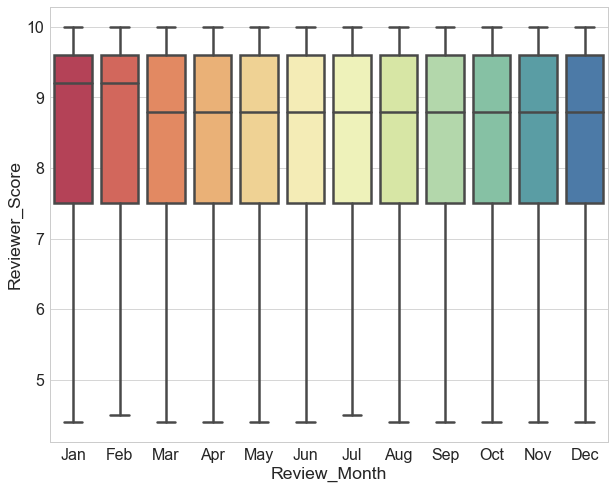

In [66]:
sns.boxplot(x='Review_Month',y='Reviewer_Score',data=htl_clean,showfliers=False,order=month,palette='Spectral');

Reviewer score in January and February on average are higher than other months.

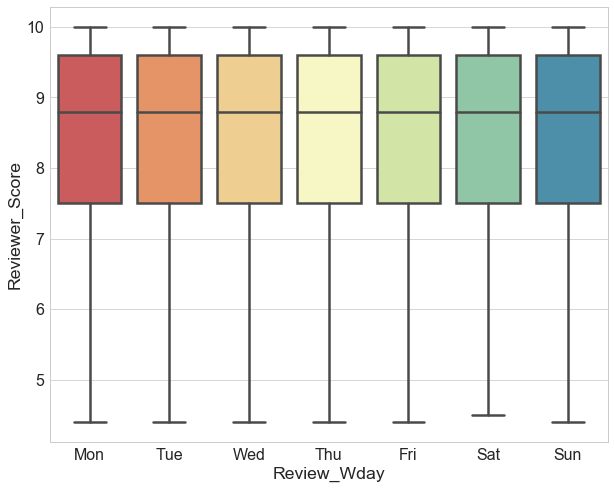

In [67]:
sns.boxplot(x='Review_Wday',y='Reviewer_Score',data=htl_clean,showfliers=False,order=wday,palette='Spectral');

Weekday doesn't seem to affect the reviewer score.

**Reviewer_score v.s. Total_Number_of_Reviews_Reviewer_Has_Given**

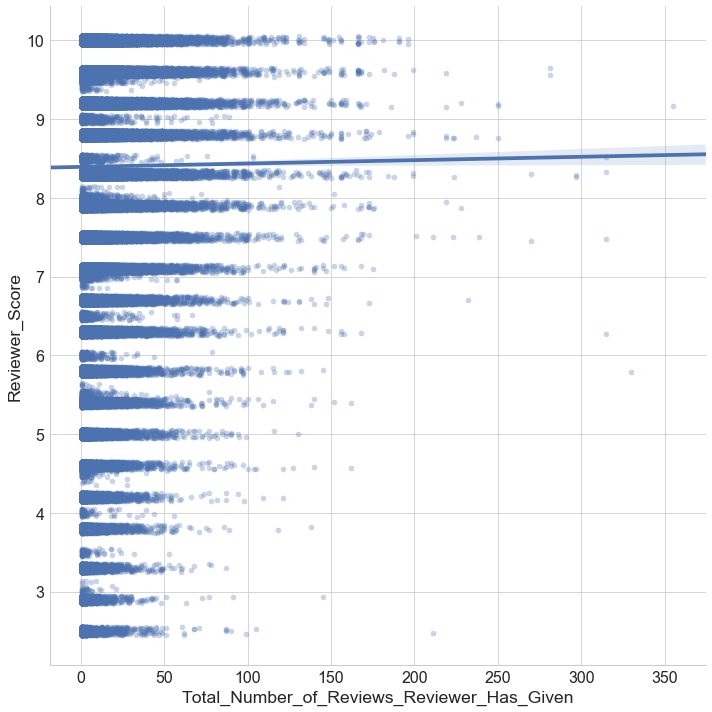

In [68]:
sns.lmplot(y='Reviewer_Score',x='Total_Number_of_Reviews_Reviewer_Has_Given',data=htl_clean,y_jitter=0.05,size=10,scatter_kws={'alpha':0.3});

The figure indicates that the more reviews reviewers posted, the higher rating score reviewers tend to give.

**Longer Reviews Indicate Higher Score or Lower Score?**

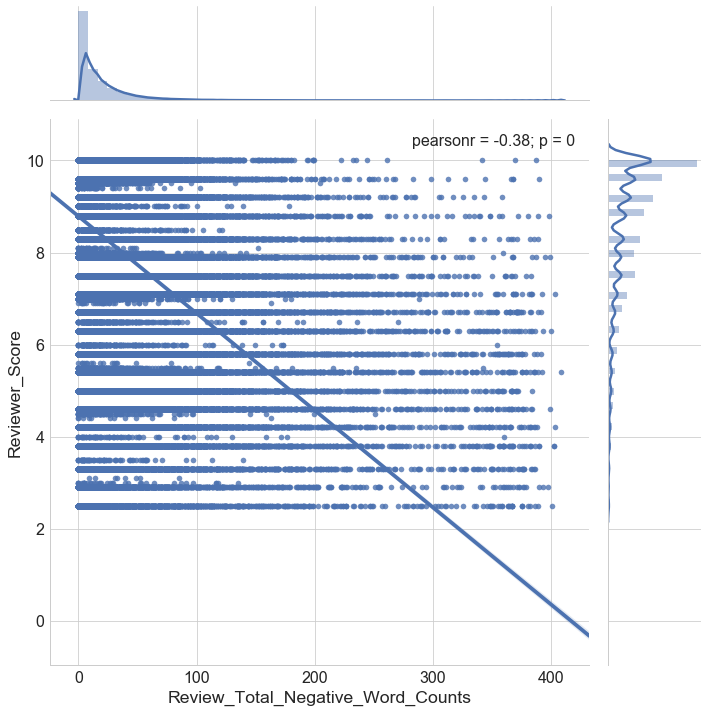

In [69]:
# Negative Reviews
ax1=sns.jointplot(data=htl_clean,y='Reviewer_Score',x='Review_Total_Negative_Word_Counts',kind="reg",size=10);


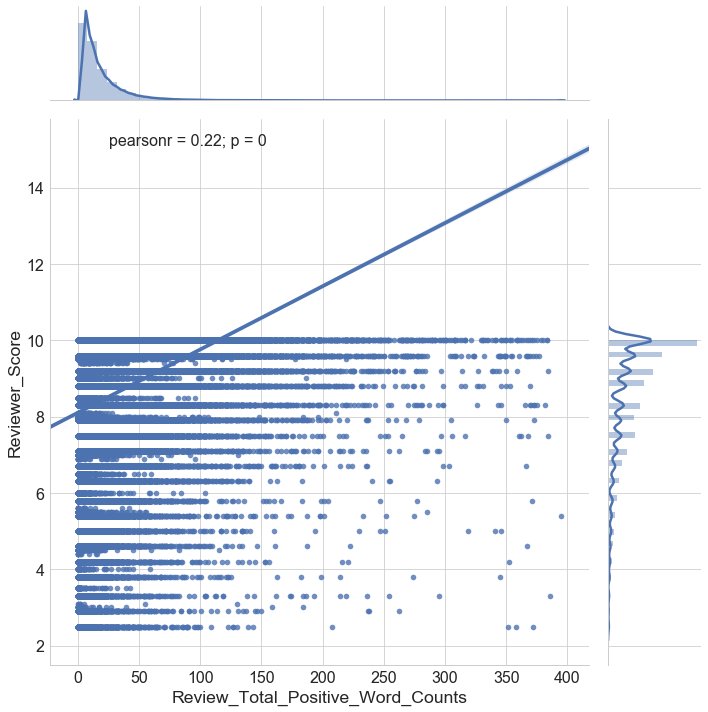

In [70]:
# Positive Reviews
ax2=sns.jointplot(data=htl_clean,y='Reviewer_Score',x='Review_Total_Positive_Word_Counts',kind="reg",size=10);


#### Where are reviewers from?

In [78]:
#Geocode address of reviewers' nations
addr=[s.strip() for s in htl_clean.Reviewer_Nationality.unique()]
#len(htl[htl.Reviewer_Nationality==' ']) # some with empty nationality

from geopy.geocoders import Nominatim
nom=Nominatim()
d_lat=dict(zip(addr, pd.Series(addr).apply(nom.geocode).apply(lambda x: x.latitude if x!=None else None)))
d_lng=dict(zip(addr, pd.Series(addr).apply(nom.geocode).apply(lambda x: x.longitude if x!=None else None))) 

# Drop missing values
df_reviewers=pd.concat([pd.DataFrame.from_dict(d_lat,orient='index'),pd.DataFrame.from_dict(d_lng,orient='index')],axis=1).dropna().sort_index().reset_index()
df_reviewers.columns=['Reviewer_Nationality','lat','lng']

# Save the data
df_reviewers.to_csv('data/reviewers_lat_lng.csv',index=False)

In [71]:
reviewer=pd.read_csv('data/reviewers_lat_lng.csv')

In [72]:
from folium import plugins
# Make a heatmap to see where the most reviewers are from
reviewers_heatmap = folium.Map(location=[reviewer['lat'].mean(), reviewer['lng'].mean()], zoom_start=2)
reviewers_heatmap.add_child(plugins.HeatMap([[row["lat"], row["lng"]] for name, row in reviewer.iterrows()]))
reviewers_heatmap.save('img/reviewers_heatmap.html')
reviewers_heatmap

![title](img/reviewer.png)

For an interactive visualization, click [here](https://houhoureviewer.herokuapp.com/index.html)

In [73]:
htl_reviewer=pd.crosstab(htl.Hotel_Address,htl.Reviewer_Nationality,margins=True).reset_index()
reviewer['Num_Reviews']=htl_reviewer.drop([' '],axis=1).iloc[-1,1:-1].values
reviewer['Num_Hotel_Reviewed']=(htl_reviewer.drop([' '],axis=1).iloc[:-1,1:-1]!=0).sum(axis=0).values
reviewer['Reviewer_Score_Avg']=htl.groupby('Reviewer_Nationality')['Reviewer_Score'].mean().drop(' ').values.round(1)
reviewer.Num_Reviews=reviewer.Num_Reviews.astype('int')

#reviewer#.sort_values('Num_Reviews',ascending=False,inplace=True)
reviewer.head()

Reviewer_Nationality        lat         lng  Num_Reviews  \
0     Abkhazia Georgia  43.150023   41.229979          153   
1          Afghanistan  33.768006   66.238514            8   
2              Albania  11.244883  -72.516099          285   
3              Algeria  28.000027    2.999983          100   
4       American Samoa -14.300631 -170.695975            2   

   Num_Hotel_Reviewed  Reviewer_Score_Avg  
0                 142                 8.4  
1                   8                 6.9  
2                 204                 8.3  
3                  90                 7.8  
4                   2                 5.6

**Top 10 nations that posted many reviews and rated high score**

In [74]:
# Select countries that posted reviews above the mean of 'Num_Reviews'
idx=reviewer.sort_values('Num_Reviews',ascending=False).Num_Reviews>reviewer.Num_Reviews.mean()
r=reviewer[idx].sort_values(['Reviewer_Score_Avg','Num_Reviews'],ascending=False)
r[['Reviewer_Nationality','Num_Reviews','Reviewer_Score_Avg']].head(10)

Reviewer_Nationality  Num_Reviews  Reviewer_Score_Avg
215  United States of America        35349                 8.8
99                     Israel         6601                 8.7
145               New Zealand         3233                 8.7
13                  Australia        21648                 8.6
213            United Kingdom       245110                 8.5
97                    Ireland        14814                 8.5
37                     Canada         7883                 8.5
184              South Africa         3816                 8.4
42                      China         3393                 8.4
166                    Russia         3898                 8.3

**Make a reviewer map**

In [75]:
import folium

reviewer_map = folium.Map(location=[reviewer['lat'].mean(),reviewer['lng'].mean()], zoom_start=2)

from folium.plugins import MarkerCluster
mc = MarkerCluster().add_to(reviewer_map)
for name, row in reviewer.iterrows():
    folium.Marker([row["lat"], row["lng"]], popup="<strong>Reviewers: </strong>{0} <br> <strong>Num_Reviews: </strong>{1}<br> <strong>Num_Hotel_Reviewed: </strong>{2}<br> <strong>Reviewer_Score_Avg: <strong>{3}".format(row['Reviewer_Nationality'],row["Num_Reviews"],row['Num_Hotel_Reviewed'],row['Reviewer_Score_Avg'])).add_to(mc)
reviewer_map.save('img/reviewer_map.html')
reviewer_map

### Visualization of Reviews

In [146]:
htl_txt=htl_clean.copy().reset_index(drop=True)[['Negative_Review','Positive_Review','Trip_Type']]
htl_txt.head()


Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

                                     Positive_Review     Trip_Type  
0   Only the park outside of the hotel was beauti...  Leisure trip  
1   No real complaints the hotel was great great ...  Leisure trip  
2   Location was good and staff were ok It is cut...  Leisure trip  
3   Great location in nice surroundings the bar a...  Leisure trip  
4    Amazing location and building Romantic setting   Leisure trip

In [147]:
htl_txt=htl_clean.copy().reset_index(drop=True)
htl_txt.Negative_Review=htl_txt.Negative_Review.replace('No Negative','')
htl_txt.Positive_Review=htl_txt.Positive_Review.replace('No Positive','')

In [148]:
htl_txt.Negative_Review.sample(10)

231245                 rooms a bit tired no bedside tables 
157801                                              nothing
118066            A nespresso machine in our executive room
273963                Location away from downtown Amsterdam
414640                                    Wifi a bit flakey
358997     when booked i had a hope for a room without t...
129563                    No water to drink except minibar 
512972     Room was a safety risk regard no space betwee...
431112                                                     
489066     The heating was only available certain times ...
Name: Negative_Review, dtype: object

In [88]:
htl_txt.Positive_Review.sample(10)

406900     The central position very close to the subway...
481055     The rooms are very comfortable and the locati...
237477                                   Sky Bar excellent 
216677                                                     
85351                                        Very comfy bed
356993     Excellent parking especially as our son s wed...
405954                               Everuthing was perfect
39590      Friendly accommodating staff nothing was too ...
321783     The size of room Upgraded on arrival and a lo...
158185     This was a great hotel and what made it extra...
Name: Positive_Review, dtype: object

#### Pre-processing text data
Though punctuations are removed in the original data set, we still need to clean the reviews by converting words to lower case, removing digits, removing whitespaces, tokenization, removing stopwords, and lemmatization. 

In [151]:
# stopwords in English
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS

# In Python, searching a set is much faster than searching a list, 
# so convert the stop words to a set
en_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS | {'hotel','rooms'}

In [158]:
# # Define a lemmatization function to remove word affixes to get the root word
# import spacy
# nlp=spacy.load('en_core_web_sm')
# def lemmatize(w):
#     txt=' '.join(w)
#     lemmatized_w=[t.lemma_ for t in nlp(txt)]
#     return lemmatized_w

# Define a function to clean and tokenize text data
def preprocess(text):
    # remove all non-letters
    text=re.sub('[^a-zA-Z]', ' ', text) 
        
    # strip white spaces
    text=text.strip()
    
    # convert to lower case
    text = text.lower()

    # tokenization
    tokens = nltk.word_tokenize(text)
    
    # remove stop words
    tokens = [w for w in tokens if len(w) >= 2]
    tokens = [w for w in tokens if not w in en_stopwords ]
    
    # lemmatization
    #tokens=lemmatize(tokens)
    
    return tokens 

txt=' '.join(htl_txt.Positive_Review.sample(5000,random_state=0)+' '+htl_txt.Negative_Review.sample(5000,random_state=0))

w_counter=Counter(preprocess(txt))

# Build a dataframe for words and its frequency
df_wc = pd.DataFrame(list(w_counter.items()),columns=['word','freq']).sort_values('freq',ascending=False)
df_wc.head()

word  freq
19        room  3054
2        staff  2319
17    location  1938
76   breakfast  1332
106       good  1291

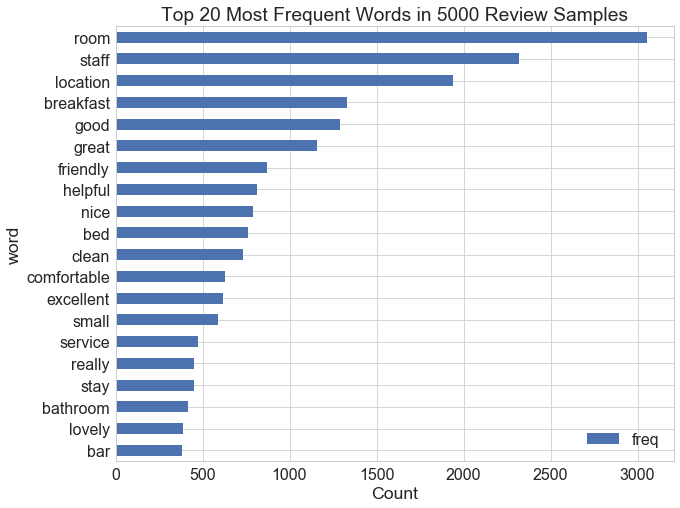

In [12]:
df_wc.set_index('word')[:20][::-1].plot(kind='barh')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Words in 5000 Review Samples');
plt.savefig('img/output_150_0.png')

#### Generate Word Cloud for Reviews

In [13]:
# define a function to generate wordcloud from text
def plot_wordcloud(data,title,c='Greens'):
    
    wordcloud = WordCloud(
        background_color='lightgray',
        colormap=c,
        stopwords=en_stopwords,
        max_words=500,
        max_font_size=50,
        random_state=123 
    ).generate(data)

    fig = plt.figure(figsize=(20, 10))#plt.figure(1, figsize=(15, 13))
    plt.axis('off')
    plt.title(title,size=28,y=1.02)
    plt.imshow(wordcloud)
    plt.show()

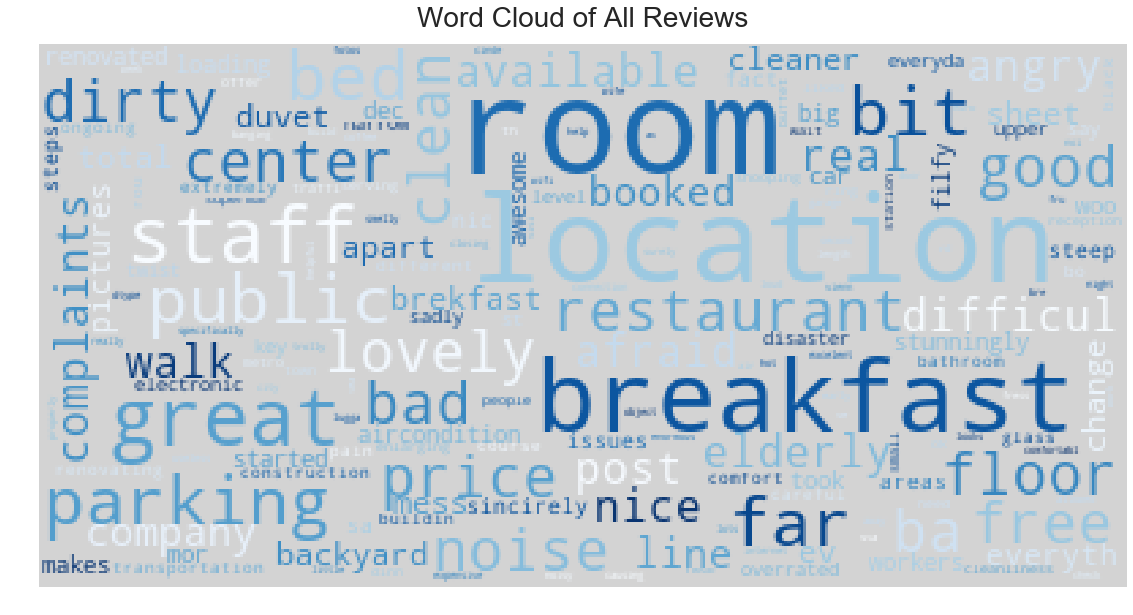

In [14]:
all_reviews=htl_txt.Negative_Review+' '+htl_txt.Positive_Review
all_reviews=' '.join(preprocess(str(all_reviews)))
plot_wordcloud(all_reviews,'Word Cloud of All Reviews','Blues')

# plot_wordcloud(htl_wc.Positive_Review,'Word Cloud of Positive Reviews')
# plot_wordcloud(htl_clean.reset_index(drop=True).Negative_Review,'Word Cloud of Negative Reviews','Reds')



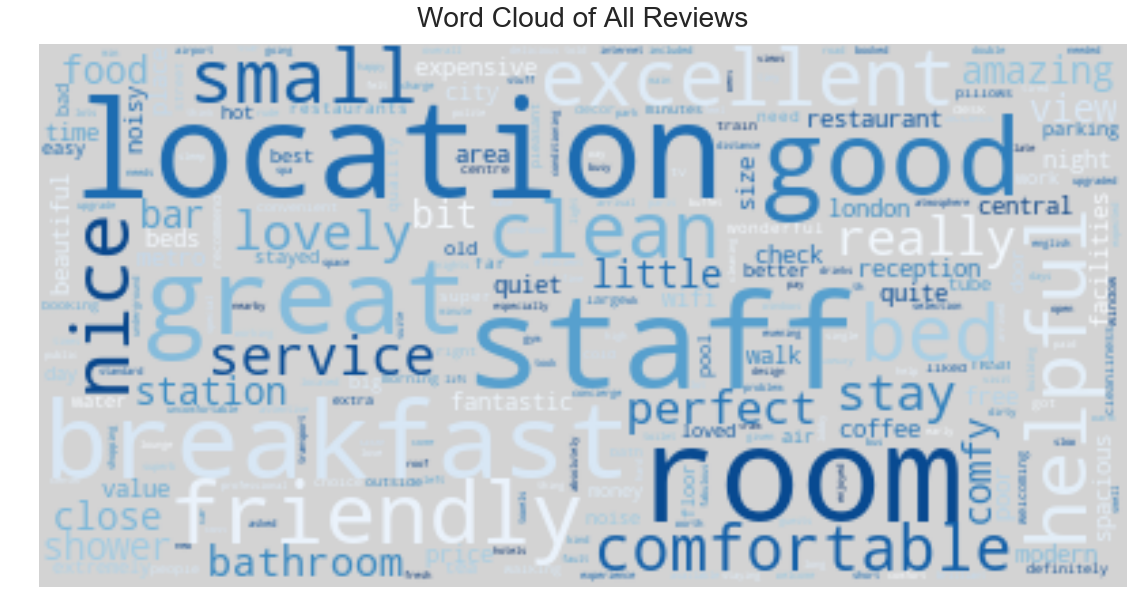

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer



# Ngram
def ngram(n,txt,c='Greens'):
    tfidf_vec = TfidfVectorizer(min_df=10, ngram_range=(1, n),stop_words=en_stopwords,lowercase=True,token_pattern='[a-zA-Z]{2,}',max_features = 5000)
    tfidf_vec.fit(txt)
    tfidf_m=tfidf_vec.transform(txt)
    words_ngram=[w for w in tfidf_vec.get_feature_names() if len(w.split(' '))>=n]#len(w.split(' '))>n-1
    idx_ngram=[tfidf_vec.vocabulary_[w] for w in words_ngram]
    dn=dict(zip(words_ngram, np.ravel(tfidf_m.sum(axis=0))[idx_ngram]))
    
    wordcloud = WordCloud(background_color='lightgray',
        colormap=c,
        stopwords=en_stopwords,
        max_words=500,
        max_font_size=50,
        random_state=123)
    wordcloud.generate_from_frequencies(frequencies=dn)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off");
# Unigram wordcloud
ngram(1,htl_txt.Negative_Review+' '+htl_txt.Positive_Review,'Blues' )#df_txt['Neg_Rev_Lemmatized'].dropna() 'Negative_Review'
plt.title('Word Cloud of All Reviews',size=28,y=1.02);




Reviewers are commenting on 'room', 'location', 'transportation', 'air condition', 'breakfast', 'floor', 'price',  'parking', 'restaurant','staff', 'noise', etc. Frequent positive words and negative words are displayed in the word cloud as well.

##### Word Cloud from reviews posted by reviewers on a business trip

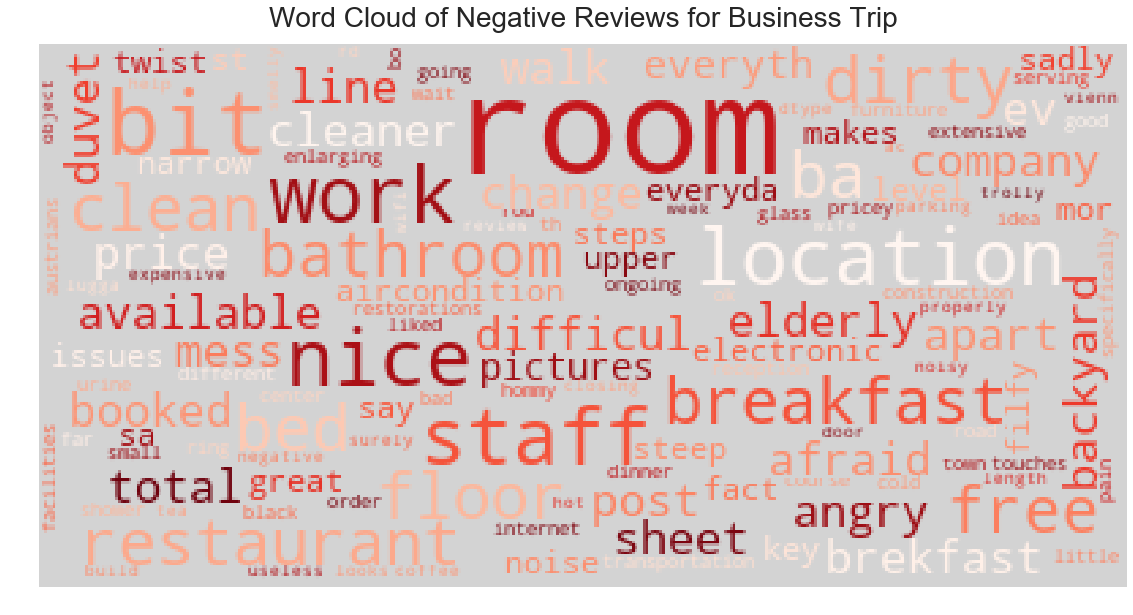

In [16]:
def rev_trip(trip):
    rev_neg=htl_txt[htl_txt.Trip_Type==trip].Negative_Review
    rev_neg=' '.join(preprocess(str(rev_neg)))
    
    rev_pos=htl_txt[htl_txt.Trip_Type==trip].reset_index(drop=True).Positive_Review
    rev_pos=' '.join(preprocess(str(rev_pos)))
    
    rev_all=rev_neg+' '+rev_pos
    rev_all=' '.join(preprocess(str(rev_all)))
    
    return rev_neg,rev_pos,rev_all

rev_neg,rev_pos,rev_all= rev_trip('Leisure trip')  


plot_wordcloud(rev_neg,'Word Cloud of Negative Reviews for Business Trip','Reds')

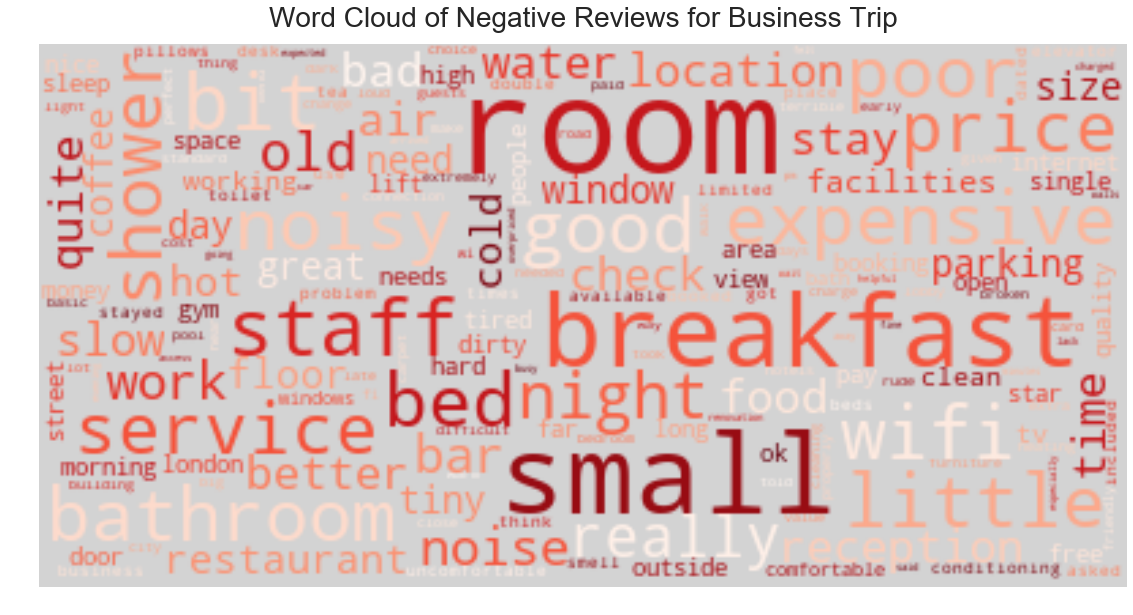

In [27]:
ngram(1,htl_txt[htl_txt.Trip_Type=='Business trip'].Negative_Review,'Reds' )
plt.title('Word Cloud of Negative Reviews for Business Trip',size=28,y=1.02);



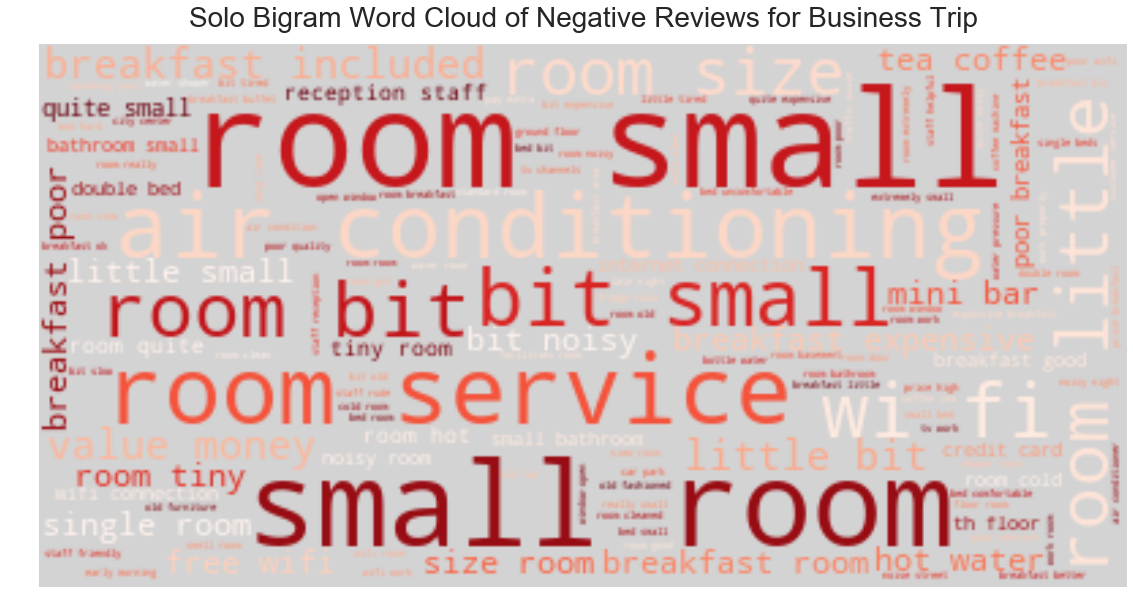

In [28]:
ngram(2,htl_txt[htl_txt.Trip_Type=='Business trip'].Negative_Review,'Reds')#df_txt['Neg_Rev_Lemmatized'].dropna() 'Negative_Review'
plt.title('Solo Bigram Word Cloud of Negative Reviews for Business Trip',size=28,y=1.02);
plt.savefig('img/bigrambusinessNeg.png')


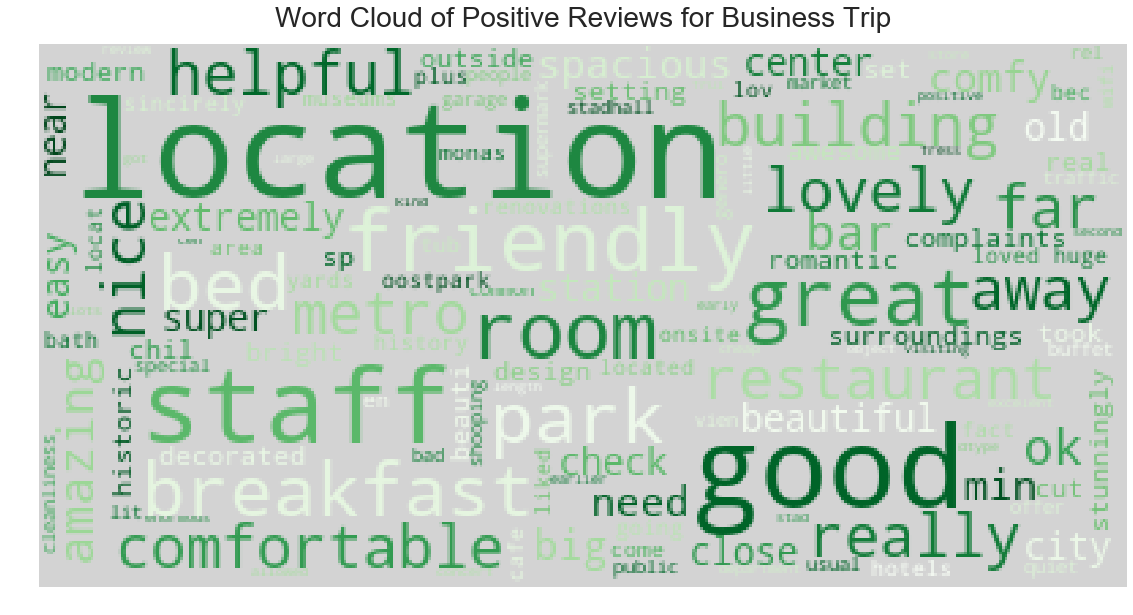

In [18]:
plot_wordcloud(rev_pos,'Word Cloud of Positive Reviews for Business Trip')


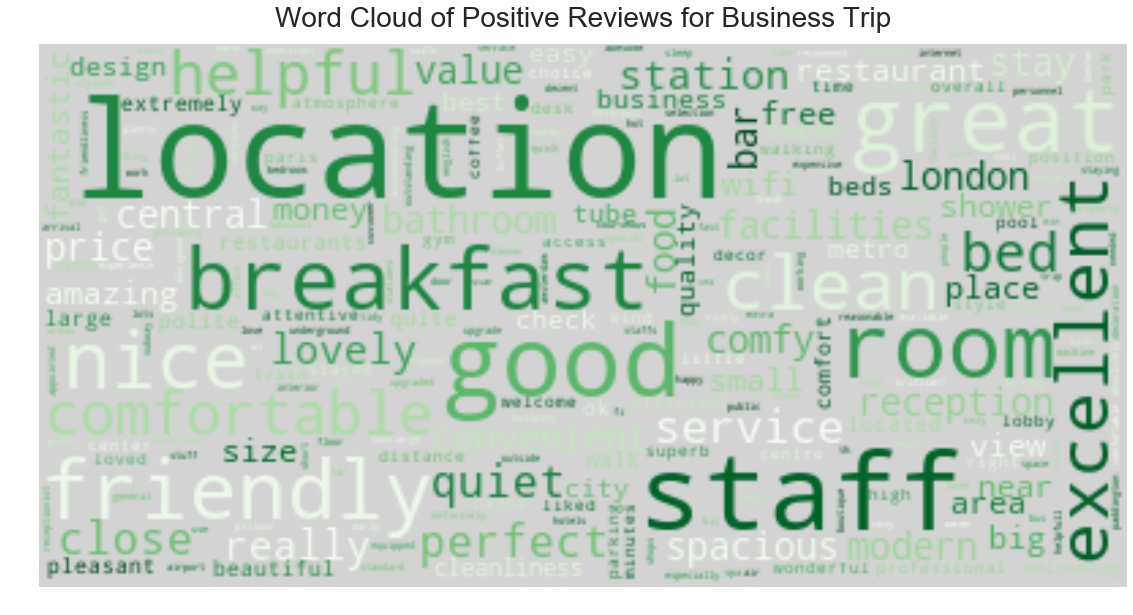

In [29]:
ngram(1,htl_txt[htl_txt.Trip_Type=='Business trip'].Positive_Review,'Greens' )
plt.title('Word Cloud of Positive Reviews for Business Trip',size=28,y=1.02);



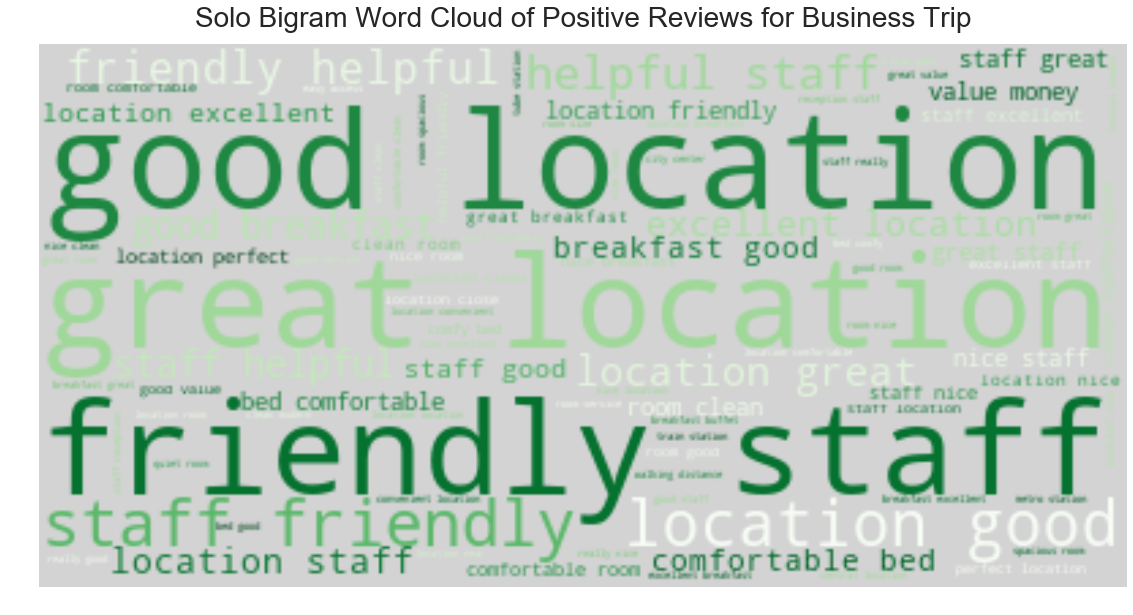

In [20]:
ngram(2,htl_txt[htl_txt.Trip_Type=='Business trip'].Positive_Review,'Greens')#df_txt['Neg_Rev_Lemmatized'].dropna() 'Negative_Review'
plt.title('Solo Bigram Word Cloud of Positive Reviews for Business Trip',size=28,y=1.02);
plt.savefig('img/bigrambusinessPos.png')

##### Word Cloud from reviews posted by reviewers on a leisure trip

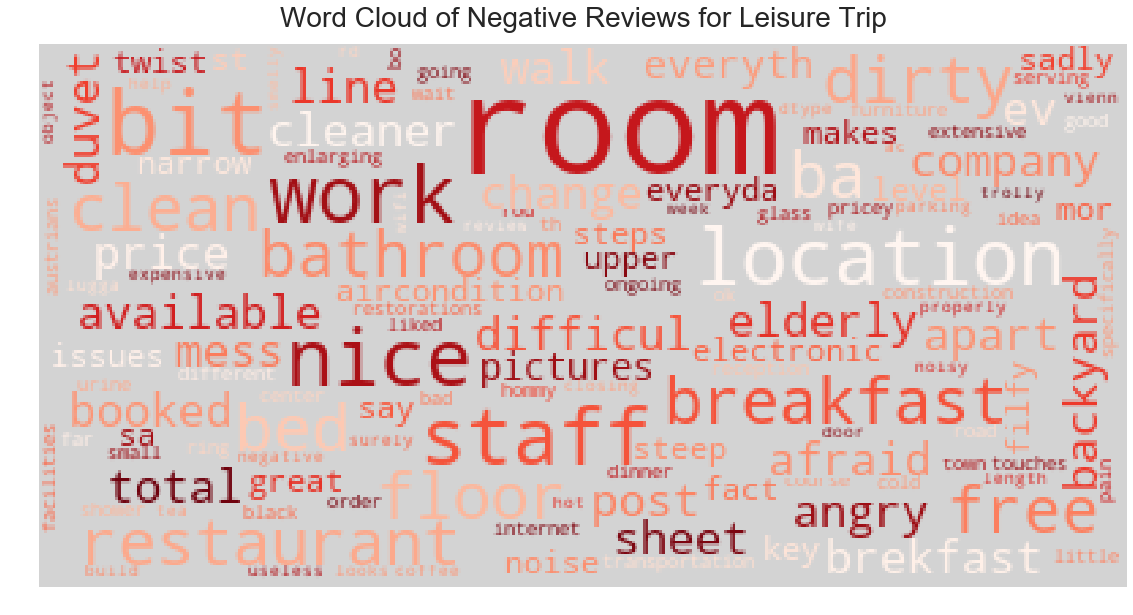

In [21]:
rev_neg,rev_pos,rev_all= rev_trip('Leisure trip')  
plot_wordcloud(rev_neg,'Word Cloud of Negative Reviews for Leisure Trip','Reds')

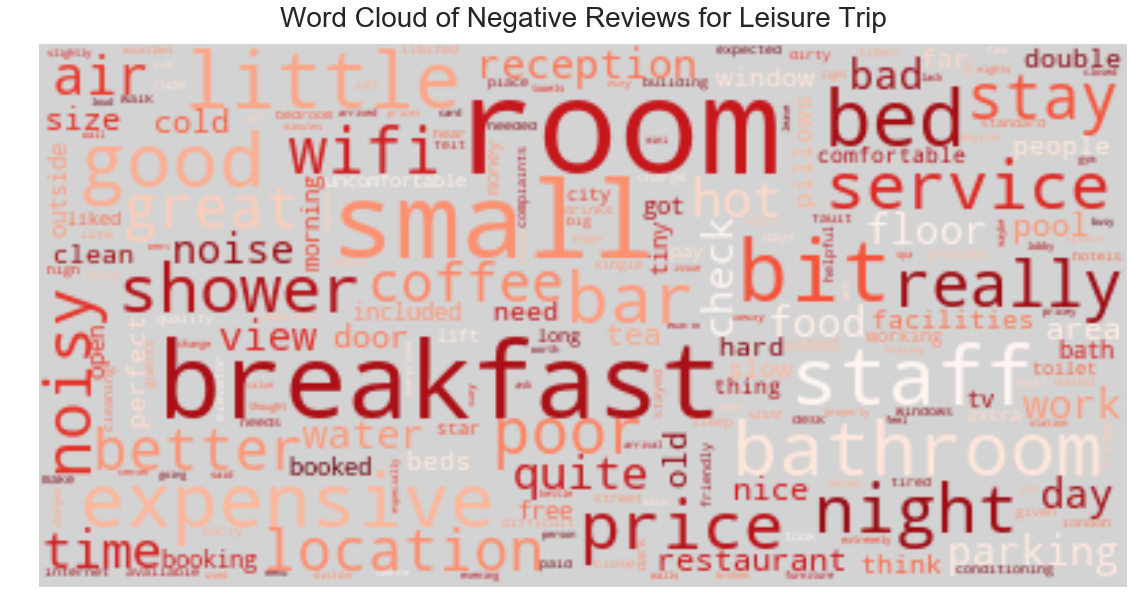

In [30]:
ngram(1,htl_txt[htl_txt.Trip_Type=='Leisure trip'].Negative_Review,'Reds' )
plt.title('Word Cloud of Negative Reviews for Leisure Trip',size=28,y=1.02);



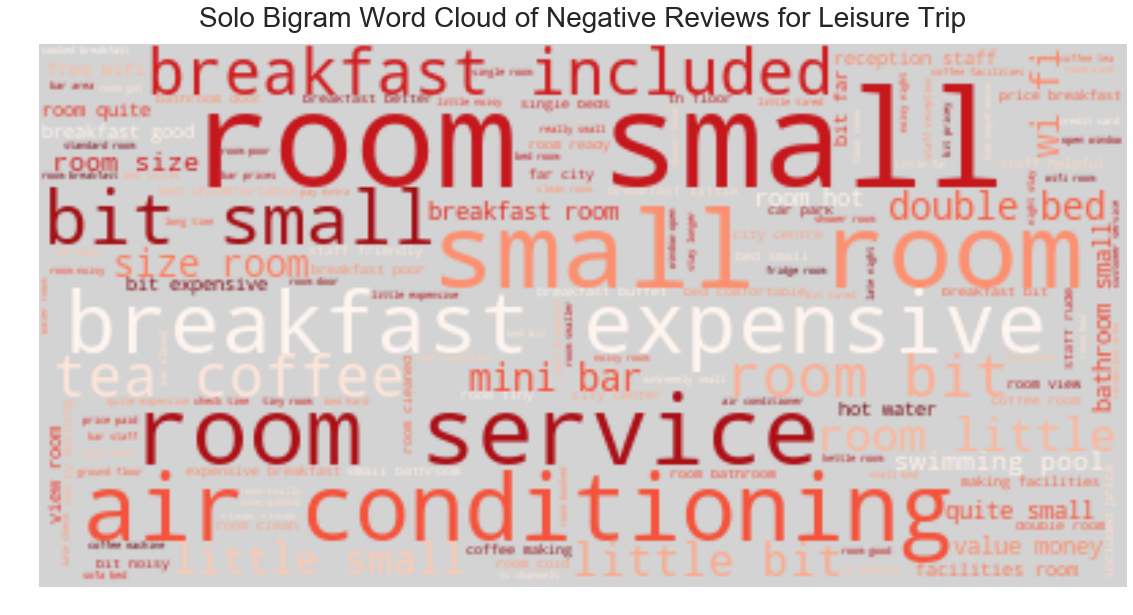

In [31]:
ngram(2,htl_txt[htl_txt.Trip_Type=='Leisure trip'].Negative_Review,'Reds')#df_txt['Neg_Rev_Lemmatized'].dropna() 'Negative_Review'
plt.title('Solo Bigram Word Cloud of Negative Reviews for Leisure Trip',size=28,y=1.02);
plt.savefig('img/bigramleisureNeg.png')

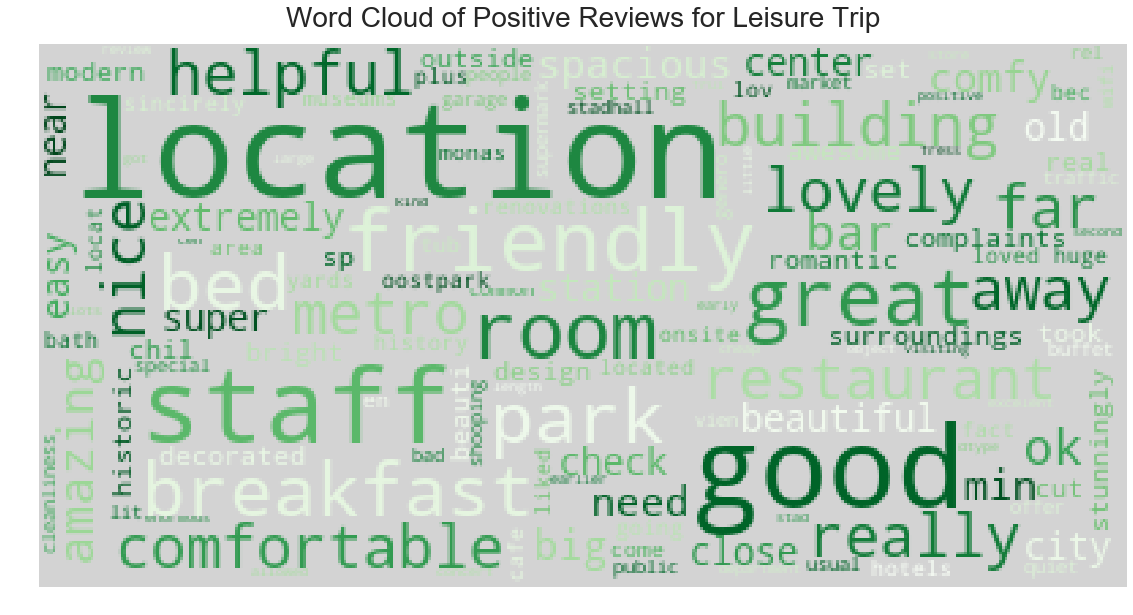

In [23]:
plot_wordcloud(rev_pos,'Word Cloud of Positive Reviews for Leisure Trip','Greens')

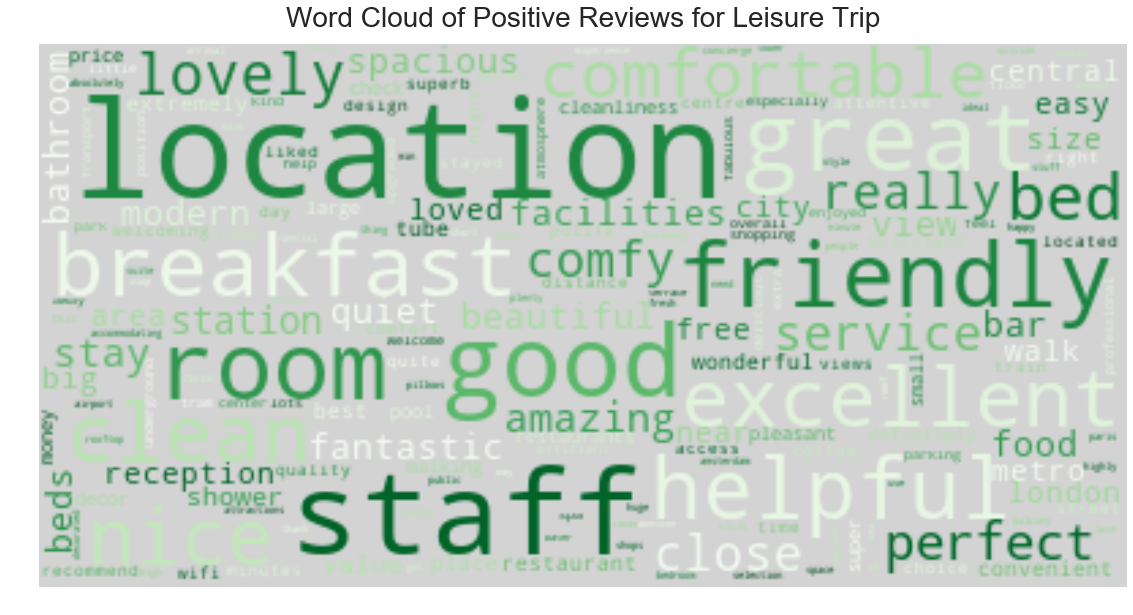

In [32]:
ngram(1,htl_txt[htl_txt.Trip_Type=='Leisure trip'].Positive_Review,'Greens' )
plt.title('Word Cloud of Positive Reviews for Leisure Trip',size=28,y=1.02);



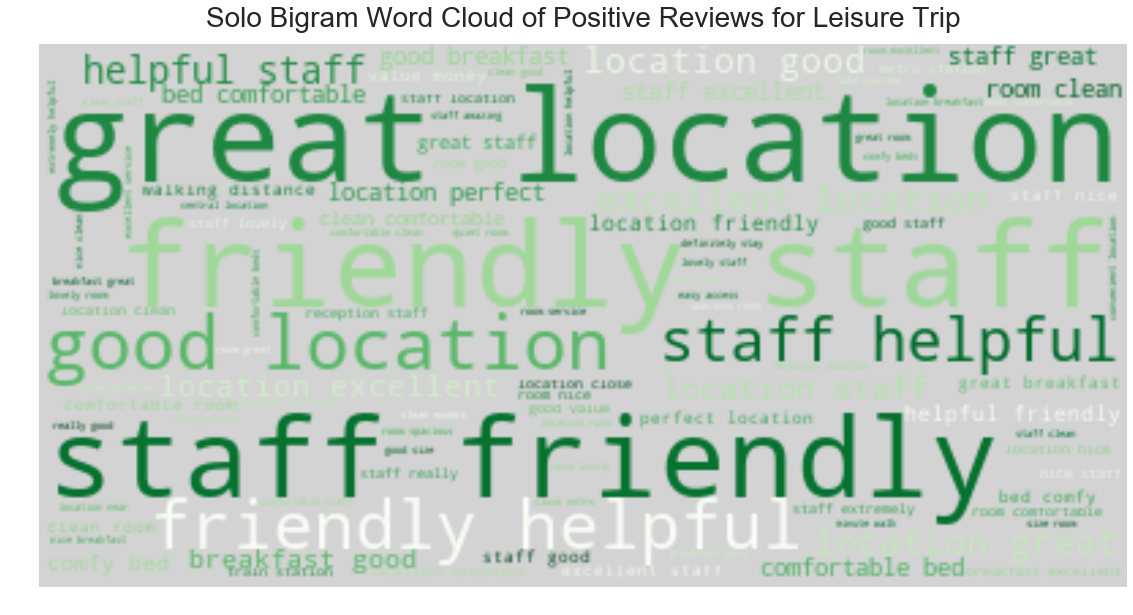

In [25]:
ngram(2,htl_txt[htl_txt.Trip_Type=='Leisure trip'].Positive_Review,'Greens')#df_txt['Neg_Rev_Lemmatized'].dropna() 'Negative_Review'
plt.title('Solo Bigram Word Cloud of Positive Reviews for Leisure Trip',size=28,y=1.02);
plt.savefig('img/bigramleisureNeg.png')




## Next Steps

### Extract Features from Text Data 
### Topic Modeling and Text Classification
### Are Review Contents Consistent with the Rating Scores?
We notice that some reviewers give very low score but posted both positive and negative aspects of the hotels while some reviewers post no negative reviews but score not that high, indicating they are unsatisfied to some extent but not mentioning. Are review contents consistent with the rating scores? How to quantify the consistency??? Might need NLP's help here! Compare predicted score with real score?
### Build Machine Learning Models to Predict the Classification of a Hotel